# Project Title: SCD Risk Prediction

# Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset_path = '/content/drive/MyDrive/CBC data_for_meandeley_csv.csv'
df = pd.read_csv(dataset_path)

In [6]:
#Importing data
path = '/content/drive/MyDrive/CBC data_for_meandeley_csv.csv'
scd = pd.read_csv(path,index_col='S. No.')

# Dataset Inspection

In [7]:
scd.head()

Age        Sex                 RBC                     PCV  \
S. No.                                                               
NaN           NaN    NaN  Red Blood Cell count  Packed Cell Volume   
1.0          28.0    0.0                  5.66                  34   
2.0          41.0    0.0                  4.78                44.5   
3.0          40.0    1.0                  4.65                41.6   
4.0          76.0    0.0                  4.24                36.7   

                   MCV                     MCH   MCHC    \
S. No.                                                    
NaN     Mean Cell Volume  Mean Cell Hemoglobin      NaN   
1.0                 60.1                    17     28.2   
2.0                 93.1                  28.9     31.0   
3.0                 89.5                  28.8     32.2   
4.0                 86.6                  26.7     30.8   

                            RDW                                TLC  PLT /mm3  \
S. No.                                                                         
NaN     Red Cell Distribution width  White Blood Cell (WBC count),  Platelet   
1.0                              20                           11.1     128.3   
2.0                              13                           7.02       419   
3.0                              13                           8.09       325   
4.0                            14.9                          13.41       264   

              HGB   
S. No.              
NaN     Hemoglobin  
1.0            9.6  
2.0           13.8  
3.0           13.4  
4.0           11.3

In [8]:
scd.shape

(374, 11)

In [9]:
# checking duplicates
len(scd[scd.duplicated()])

16

In [10]:
scd['PCV']

S. No.
NaN    Packed Cell Volume
1.0                    34
2.0                  44.5
3.0                  41.6
4.0                  36.7
              ...        
NaN                   NaN
NaN                   NaN
NaN                   NaN
NaN                   NaN
NaN                   NaN
Name: PCV, Length: 374, dtype: object

In [11]:
scd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, nan to nan
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        364 non-null    float64
 1   Sex        364 non-null    float64
 2     RBC      365 non-null    object 
 3   PCV        365 non-null    object 
 4   MCV        365 non-null    object 
 5   MCH        365 non-null    object 
 6    MCHC      364 non-null    float64
 7    RDW       365 non-null    object 
 8   TLC        365 non-null    object 
 9    PLT /mm3  365 non-null    object 
 10   HGB       365 non-null    object 
dtypes: float64(3), object(8)
memory usage: 35.1+ KB


In [12]:
scd.describe(include='all').T

count unique   top freq       mean        std   min   25%   50%  \
Age        364.0    NaN   NaN  NaN  44.917582  18.780854  11.0  28.0  44.5   
Sex        364.0    NaN   NaN  NaN   0.442308   0.497344   0.0   0.0   0.0   
  RBC        365    196   4.1    6        NaN        NaN   NaN   NaN   NaN   
PCV          365    189  33.1    7        NaN        NaN   NaN   NaN   NaN   
MCV          365    201  89.2    9        NaN        NaN   NaN   NaN   NaN   
MCH          365    141  28.8   12        NaN        NaN   NaN   NaN   NaN   
 MCHC      364.0    NaN   NaN  NaN  32.053407    2.80179  23.6  30.3  31.7   
 RDW         365     84  13.1   12        NaN        NaN   NaN   NaN   NaN   
TLC          365    238   8.4    6        NaN        NaN   NaN   NaN   NaN   
 PLT /mm3    365    209   150   15        NaN        NaN   NaN   NaN   NaN   
 HGB         365     85  13.4   12        NaN        NaN   NaN   NaN   NaN   

            75%   max  
Age        60.0  89.0  
Sex         1.0   1.0  
  RBC       NaN   NaN  
PCV         NaN   NaN  
MCV         NaN   NaN  
MCH         NaN   NaN  
 MCHC      33.3  50.2  
 RDW        NaN   NaN  
TLC         NaN   NaN  
 PLT /mm3   NaN   NaN  
 HGB        NaN   NaN

In [13]:
# checking null values
scd.isna().sum().sum()

102

In [14]:
# check null values count
scd.isnull().sum()

Age          10
Sex          10
  RBC         9
PCV           9
MCV           9
MCH           9
 MCHC        10
 RDW          9
TLC           9
 PLT /mm3     9
 HGB          9
dtype: int64

<Axes: ylabel='S. No.'>

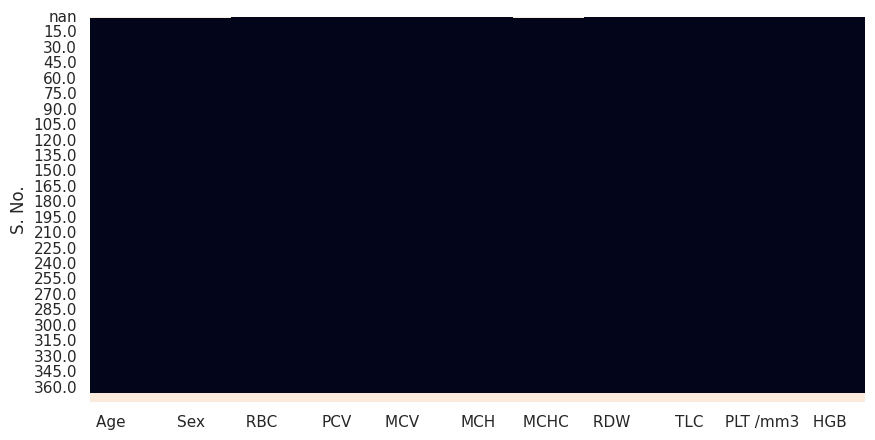

In [15]:
# Visualizing the missing values by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(scd.isnull(), cbar=False)

# Data Cleaning

In [16]:
# Dataset Columns
scd.columns

Index(['Age      ', 'Sex  ', '  RBC    ', 'PCV', 'MCV  ', 'MCH', ' MCHC  ',
       ' RDW    ', 'TLC', ' PLT /mm3', ' HGB '],
      dtype='object')

In [17]:
# Dataset Describe
scd.describe(include='all')

Age             Sex     RBC       PCV MCV     MCH      MCHC    \
count   364.000000  364.000000       365   365   365   365  364.000000   
unique         NaN         NaN       196   189   201   141         NaN   
top            NaN         NaN       4.1  33.1  89.2  28.8         NaN   
freq           NaN         NaN         6     7     9    12         NaN   
mean     44.917582    0.442308       NaN   NaN   NaN   NaN   32.053407   
std      18.780854    0.497344       NaN   NaN   NaN   NaN    2.801790   
min      11.000000    0.000000       NaN   NaN   NaN   NaN   23.600000   
25%      28.000000    0.000000       NaN   NaN   NaN   NaN   30.300000   
50%      44.500000    0.000000       NaN   NaN   NaN   NaN   31.700000   
75%      60.000000    1.000000       NaN   NaN   NaN   NaN   33.300000   
max      89.000000    1.000000       NaN   NaN   NaN   NaN   50.200000   

        RDW      TLC  PLT /mm3  HGB   
count       365  365       365   365  
unique       84  238       209    85  
top        13.1  8.4       150  13.4  
freq         12    6        15    12  
mean        NaN  NaN       NaN   NaN  
std         NaN  NaN       NaN   NaN  
min         NaN  NaN       NaN   NaN  
25%         NaN  NaN       NaN   NaN  
50%         NaN  NaN       NaN   NaN  
75%         NaN  NaN       NaN   NaN  
max         NaN  NaN       NaN   NaN

In [18]:
# Renaming the columns
scd.rename(columns={
    'Age      ': 'Age',
    'Sex  ': 'Sex',
    '  RBC    ': 'RedBloodCellcount',  # Updated column name
    'PCV': 'PackedCellVolume',
    'MCV  ': 'MeanCellVolume',
    'MCH': 'MeanCellHemoglobin',
    ' MCHC  ': 'MeanCorpuscularHemoglobinConcentration',
    ' RDW    ': 'RedCellDistributionWidth',
    'TLC': 'WhiteBloodCellWBCcount',
    ' PLT /mm3': 'Platelet',
    ' HGB ': 'Hemoglobin'
}, inplace=True)

# Print the updated column names to verify the changes
print(scd.columns)


Index(['Age', 'Sex', 'RedBloodCellcount', 'PackedCellVolume', 'MeanCellVolume',
       'MeanCellHemoglobin', 'MeanCorpuscularHemoglobinConcentration',
       'RedCellDistributionWidth', 'WhiteBloodCellWBCcount', 'Platelet',
       'Hemoglobin'],
      dtype='object')


In [19]:
scd.columns

Index(['Age', 'Sex', 'RedBloodCellcount', 'PackedCellVolume', 'MeanCellVolume',
       'MeanCellHemoglobin', 'MeanCorpuscularHemoglobinConcentration',
       'RedCellDistributionWidth', 'WhiteBloodCellWBCcount', 'Platelet',
       'Hemoglobin'],
      dtype='object')

In [20]:
# Check Unique Values for each variable.
for i in scd.columns.tolist():
  print("Unique values in",i,":",scd[i].nunique())

Unique values in Age : 73
Unique values in Sex : 2
Unique values in RedBloodCellcount : 196
Unique values in PackedCellVolume : 189
Unique values in MeanCellVolume : 201
Unique values in MeanCellHemoglobin : 141
Unique values in MeanCorpuscularHemoglobinConcentration : 102
Unique values in RedCellDistributionWidth : 84
Unique values in WhiteBloodCellWBCcount : 238
Unique values in Platelet : 209
Unique values in Hemoglobin : 85


In [21]:
import pandas as pd

# Assuming 'scd' is your DataFrame
scd['RedBloodCellcount'] = pd.to_numeric(scd['RedBloodCellcount'], errors='coerce')

scd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, nan to nan
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     364 non-null    float64
 1   Sex                                     364 non-null    float64
 2   RedBloodCellcount                       364 non-null    float64
 3   PackedCellVolume                        365 non-null    object 
 4   MeanCellVolume                          365 non-null    object 
 5   MeanCellHemoglobin                      365 non-null    object 
 6   MeanCorpuscularHemoglobinConcentration  364 non-null    float64
 7   RedCellDistributionWidth                365 non-null    object 
 8   WhiteBloodCellWBCcount                  365 non-null    object 
 9   Platelet                                365 non-null    object 
 10  Hemoglobin                              365 non-null    object 
d

In [86]:
import pandas as pd

# Convert object-type columns to numeric in the scd DataFrame
scd['PackedCellVolume'] = pd.to_numeric(scd['PackedCellVolume'], errors='coerce')
scd['RedBloodCellcount'] = pd.to_numeric(scd['RedBloodCellcount'], errors='coerce')
scd['MeanCellVolume'] = pd.to_numeric(scd['MeanCellVolume'], errors='coerce')
scd['MeanCellHemoglobin'] = pd.to_numeric(scd['MeanCellHemoglobin'], errors='coerce')
scd['RedCellDistributionWidth'] = pd.to_numeric(scd['RedCellDistributionWidth'], errors='coerce')
scd['WhiteBloodCellWBCcount'] = pd.to_numeric(scd['WhiteBloodCellWBCcount'], errors='coerce')
scd['Platelet'] = pd.to_numeric(scd['Platelet'], errors='coerce')
scd['Hemoglobin'] = pd.to_numeric(scd['Hemoglobin'], errors='coerce')


In [25]:
import pandas as pd

# Assuming the data is stored in a DataFrame called scd
# Establishing conditions based on the provided features
# Adjust the thresholds as needed based on medical knowledge and the specific dataset

# Define thresholds for each feature
rbc_threshold = 7.5  # Example threshold for Red Blood Cell count (in million/μL)
pcv_threshold = 80.0  # Example threshold for Packed Cell Volume (%)
mcv_threshold = 300.0  # Example threshold for Mean Cell Volume (fL)
mch_threshold = 35.0  # Example threshold for Mean Cell Hemoglobin (pg)
mchc_threshold = 32.0  # Example threshold for Mean Corpuscular Hemoglobin Concentration (g/dL)
rdw_threshold = 5.0  # Example threshold for Red Cell Distribution Width (%)
wbc_threshold = 6.0  # Example threshold for White Blood Cell count (thousand/μL)
plt_threshold = 100.0  # Example threshold for Platelet count (thousand/μL)
hemoglobin_threshold = 50.0  # Example threshold for Hemoglobin (g/dL)


# Now perform the comparison operation
scd['ishavingdisease'] = (
    (scd['RedBloodCellcount'] < rbc_threshold) &
    (scd['PackedCellVolume'] < pcv_threshold) &
    (scd['MeanCellVolume'] < mcv_threshold) &
    (scd['MeanCellHemoglobin'] < mch_threshold) &
    (scd['MeanCorpuscularHemoglobinConcentration'] < mchc_threshold) &
    (scd['RedCellDistributionWidth'] > rdw_threshold) &
    (scd['WhiteBloodCellWBCcount'] > wbc_threshold) &
    (scd['Platelet'] > plt_threshold) &
    (scd['Hemoglobin'] < hemoglobin_threshold)
).astype(int)


In [26]:
# Assuming 'scd' is your DataFrame
num_ones = (scd['ishavingdisease'] == 1).sum()
print("Number of individuals having disease:", num_ones)


Number of individuals having disease: 158


In [27]:
# Assuming 'scd' is your DataFrame
median_values = scd.median()
print(median_values)


Age                                        44.500
Sex                                         0.000
RedBloodCellcount                           4.335
PackedCellVolume                           36.800
MeanCellVolume                             87.950
MeanCellHemoglobin                         28.200
MeanCorpuscularHemoglobinConcentration     31.700
RedCellDistributionWidth                   14.800
WhiteBloodCellWBCcount                      7.935
Platelet                                  210.000
Hemoglobin                                 12.100
ishavingdisease                             0.000
dtype: float64


In [28]:
# # Given mapping of column names to their descriptions
# column_mapping = {
#     'Age      ': 'Age',
#     'Sex  ': 'Sex',
#     '  RBC    ': 'RedBloodCellcount',
#     'PCV': 'PackedCellVolume',
#     'MCV  ': 'MeanCellVolume',
#     'MCH': 'MeanCellHemoglobin',
#     ' MCHC  ': 'MeanCorpuscularHemoglobinConcentration',
#     ' RDW    ': 'RedCellDistributionWidth',
#     'TLC': 'WhiteBloodCellWBCcount',
#     'PLT /mm3': 'Platelet',
#     ' HGB ': 'Hemoglobin'}

# Dependent variables
dependent_variables = ['ishavingdisease']

# Continuous variables (assuming all numerical columns are continuous)
continuous_variables = ['RedBloodCellcount', 'PackedCellVolume', 'MeanCellVolume',
                        'MeanCellHemoglobin', 'MeanCorpuscularHemoglobinConcentration',
                        'RedCellDistributionWidth', 'WhiteBloodCellWBCcount', 'Platelet',
                        'Hemoglobin','Sex']


# Print the results
print("Dependent variables:", dependent_variables)
print("Continuous variables:", continuous_variables)


Dependent variables: ['ishavingdisease']
Continuous variables: ['RedBloodCellcount', 'PackedCellVolume', 'MeanCellVolume', 'MeanCellHemoglobin', 'MeanCorpuscularHemoglobinConcentration', 'RedCellDistributionWidth', 'WhiteBloodCellWBCcount', 'Platelet', 'Hemoglobin', 'Sex']


In [29]:
# import pandas as pd

# # Given mapping of column names to their descriptions
# column_mapping = {
#     'Age      ': 'Age',
#     'Sex  ': 'Sex',
#     '  RBC    ': 'Red Blood Cell count',
#     'PCV': 'Packed Cell Volume',
#     'MCV  ': 'Mean Cell Volume',
#     'MCH': 'Mean Cell Hemoglobin',
#     ' MCHC  ': 'Mean Corpuscular Hemoglobin Concentration',
#     ' RDW    ': 'Red Cell Distribution Width',
#     'TLC': 'White Blood Cell (WBC count)',
#     'PLT /mm3': 'Platelet',
#     ' HGB ': 'Hemoglobin'
# }

# # Assuming 'Sex' is the only categorical variable
# categorical_variables = ['Sex']

# # Convert 'Sex' column to one-hot encoding
# data = {'Sex': ['Male', 'Female', 'Male', 'Female']}
# df = pd.DataFrame(data)

# # Perform one-hot encoding
# df_encoded = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# print("Original DataFrame:")
# print(df)
# print("\nDataFrame after one-hot encoding:")
# print(df_encoded)


In [30]:
# # Encoding the binary columns

# scd['Sex'] = np.where(scd['Sex'] == 'M',1,0)

# Handling Missing Data



In [31]:
# Replacing the missing values in the categorical columns with its mode
# Fill null values in scd DataFrame

# For categorical columns, fill null values with the mode (most frequent value)
categorical_columns = ['Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']
for column in categorical_columns:
    if column in scd.columns:
        mode_value = scd[column].mode()[0]  # Get the mode (most frequent value)
        scd[column] = scd[column].fillna(mode_value)

# For continuous columns, fill null values with the mean or median
continuous_columns = ['Age']
for column in continuous_columns:
    if column in scd.columns:
        mean_value = scd[column].mean()  # Calculate the mean of the column
        scd[column] = scd[column].fillna(mean_value)

# Displaying the DataFrame's summary to verify the null values have been filled
print(scd.info())


<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, nan to nan
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     374 non-null    float64
 1   Sex                                     374 non-null    float64
 2   RedBloodCellcount                       364 non-null    float64
 3   PackedCellVolume                        364 non-null    float64
 4   MeanCellVolume                          364 non-null    float64
 5   MeanCellHemoglobin                      364 non-null    float64
 6   MeanCorpuscularHemoglobinConcentration  364 non-null    float64
 7   RedCellDistributionWidth                364 non-null    float64
 8   WhiteBloodCellWBCcount                  364 non-null    float64
 9   Platelet                                364 non-null    float64
 10  Hemoglobin                              364 non-null    float64
 

In [32]:
# age distribution after mode imputation
scd.Age.value_counts()

Age
65.0    18
35.0    16
57.0    15
60.0    13
28.0    13
        ..
11.0     1
89.0     1
79.0     1
64.0     1
39.0     1
Name: count, Length: 74, dtype: int64

In [33]:
scd.RedBloodCellcount.value_counts()

RedBloodCellcount
4.47    6
4.10    6
4.33    5
4.86    5
5.17    4
       ..
3.37    1
3.21    1
5.07    1
4.07    1
3.42    1
Name: count, Length: 195, dtype: int64

In [34]:
scd.Sex.value_counts()

Sex
0.0    213
1.0    161
Name: count, dtype: int64

In [35]:
# Convert the SCD risk factor column to numeric values
scd['RedBloodCellcount'] = pd.to_numeric(scd['RedBloodCellcount'], errors='coerce')

# Calculate the mean and median of the SCD risk factor column
mean_red_blood_cell_count = scd['RedBloodCellcount'].mean().round(0)
median_red_blood_cell_count = scd['RedBloodCellcount'].median()

# Print the mean and median values
print("Mean of RedBloodCellcount:", mean_red_blood_cell_count)
print("Median of RedBloodCellcount:", median_red_blood_cell_count)


Mean of RedBloodCellcount: 4.0
Median of RedBloodCellcount: 4.335


In [36]:
scd[scd['Hemoglobin'].isna()]

Age  Sex  RedBloodCellcount  PackedCellVolume  MeanCellVolume  \
S. No.                                                                        
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   

        MeanCellHemoglobin  MeanCorpuscularHemoglobinConcentration  \
S. No.                                                               
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   

        RedCellDistributionWidth  WhiteBloodCellWBCcount  Platelet  \
S. No.                                                               
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   

        Hemoglobin  ishavingdisease  
S. No.                               
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0

In [37]:
scd[scd['RedBloodCellcount'].isna()]

Age  Sex  RedBloodCellcount  PackedCellVolume  MeanCellVolume  \
S. No.                                                                        
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   

        MeanCellHemoglobin  MeanCorpuscularHemoglobinConcentration  \
S. No.                                                               
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   

        RedCellDistributionWidth  WhiteBloodCellWBCcount  Platelet  \
S. No.                                                               
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   

        Hemoglobin  ishavingdisease  
S. No.                               
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0

In [38]:
scd[scd['MeanCorpuscularHemoglobinConcentration'].isna()]

Age  Sex  RedBloodCellcount  PackedCellVolume  MeanCellVolume  \
S. No.                                                                        
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   
NaN     44.917582  0.0                NaN               NaN             NaN   

        MeanCellHemoglobin  MeanCorpuscularHemoglobinConcentration  \
S. No.                                                               
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   
NaN                    NaN                                     NaN   

        RedCellDistributionWidth  WhiteBloodCellWBCcount  Platelet  \
S. No.                                                               
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   
NaN                          NaN                     NaN       NaN   

        Hemoglobin  ishavingdisease  
S. No.                               
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0  
NaN            NaN                0

In [39]:
# mean and median number of Red_Blood_Cell_count
scd[scd['RedBloodCellcount']>1]['RedBloodCellcount'].mean(),scd[scd['RedBloodCellcount']>1]['RedBloodCellcount'].median()

(4.278736263736264, 4.335)

In [40]:
# mean and median number of Age
scd[scd['Age']>1]['Age'].mean(),scd[scd['Age']>1]['Age'].median()

(44.91758241758242, 44.917582417582416)

In [41]:
# Convert 'Packed_Cell_Volume' column to numeric values
scd['PackedCellVolume'] = pd.to_numeric(scd['PackedCellVolume'], errors='coerce')

# Filter out non-null values and perform mean and median calculations
packed_cell_volume_mean = scd.loc[scd['PackedCellVolume'].notnull(), 'PackedCellVolume'].mean()
packed_cell_volume_median = scd.loc[scd['PackedCellVolume'].notnull(), 'PackedCellVolume'].median()

# Print the mean and median values
print("Mean Packed Cell Volume:", packed_cell_volume_mean)
print("Median Packed Cell Volume:", packed_cell_volume_median)


Mean Packed Cell Volume: 36.76291208791209
Median Packed Cell Volume: 36.8


In [42]:
# Convert 'Mean_Cell_Volume' column to numeric values
scd['MeanCellVolume'] = pd.to_numeric(scd['MeanCellVolume'], errors='coerce')

# Filter out non-null values and perform mean and median calculations
mean_mean_cell_volume = scd.loc[scd['MeanCellVolume'].notnull(), 'MeanCellVolume'].mean()
median_mean_cell_volume = scd.loc[scd['MeanCellVolume'].notnull(), 'MeanCellVolume'].median()

# Print the mean and median values
print("Mean Mean Cell Volume:", mean_mean_cell_volume)
print("Median Mean Cell Volume:", median_mean_cell_volume)


Mean Mean Cell Volume: 87.50912087912089
Median Mean Cell Volume: 87.95


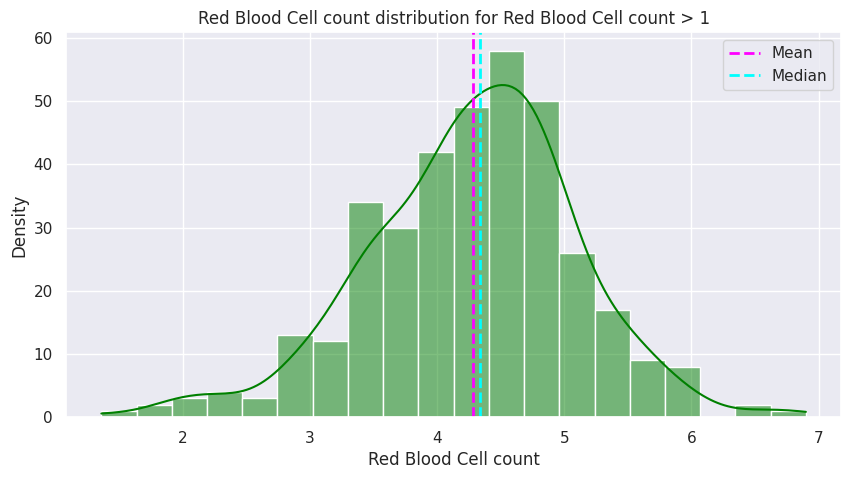

In [43]:
# distribution of Red_Blood_Cell_count
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Red Blood Cell count for values greater than 1
plt.figure(figsize=(10, 5))
sns.histplot(scd[scd['RedBloodCellcount'] > 1]['RedBloodCellcount'], color='green', kde=True)

# Plot the mean and median as vertical dashed lines
mean_value = scd[scd['RedBloodCellcount'] > 1]['RedBloodCellcount'].mean()
median_value = scd[scd['RedBloodCellcount'] > 1]['RedBloodCellcount'].median()

# Mean line
plt.axvline(mean_value, color='magenta', linestyle='dashed', linewidth=2, label='Mean')
# Median line
plt.axvline(median_value, color='cyan', linestyle='dashed', linewidth=2, label='Median')

# Add title and labels
plt.title('Red Blood Cell count distribution for Red Blood Cell count > 1')
plt.xlabel('Red Blood Cell count')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()


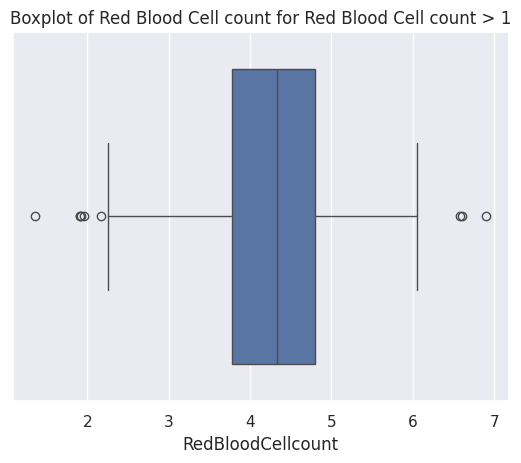

In [44]:
# box plot for Red_Blood_Cell_count
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of Red Blood Cell count for values greater than 1
sns.boxplot(x=scd[scd['RedBloodCellcount'] > 1]['RedBloodCellcount'])

# Add a title to the plot
plt.title('Boxplot of Red Blood Cell count for Red Blood Cell count > 1')

# Display the plot
plt.show()


In [45]:
# Imputing the missing values in the Red_Blood_Cell_count
scd['RedBloodCellcount'] = scd['RedBloodCellcount'].fillna(scd[scd['Hemoglobin']==1]['RedBloodCellcount'].median())

In [46]:
# checking any wrong entries
scd[(scd['Hemoglobin']==0) & (scd['RedBloodCellcount']>0)]

Empty DataFrame
Columns: [Age, Sex, RedBloodCellcount, PackedCellVolume, MeanCellVolume, MeanCellHemoglobin, MeanCorpuscularHemoglobinConcentration, RedCellDistributionWidth, WhiteBloodCellWBCcount, Platelet, Hemoglobin, ishavingdisease]
Index: []

In [47]:
#checking any wrong entries
scd[(scd['RedBloodCellcount']==1) & (scd['Hemoglobin']==0)]

Empty DataFrame
Columns: [Age, Sex, RedBloodCellcount, PackedCellVolume, MeanCellVolume, MeanCellHemoglobin, MeanCorpuscularHemoglobinConcentration, RedCellDistributionWidth, WhiteBloodCellWBCcount, Platelet, Hemoglobin, ishavingdisease]
Index: []

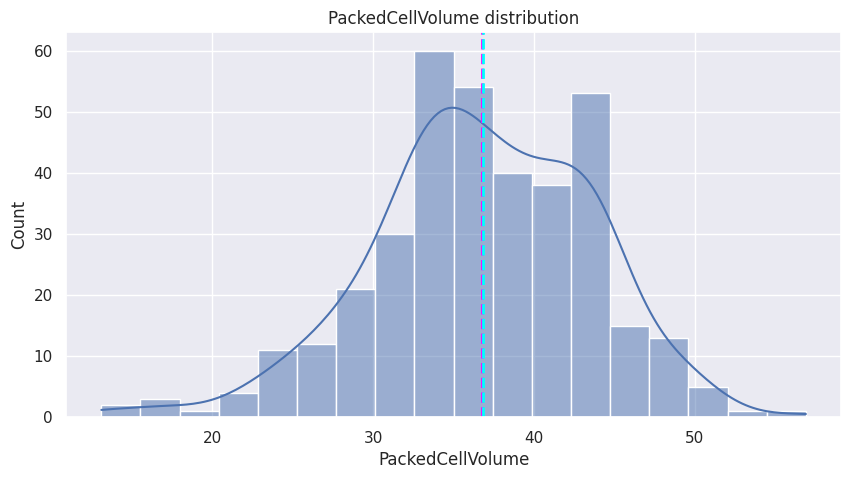

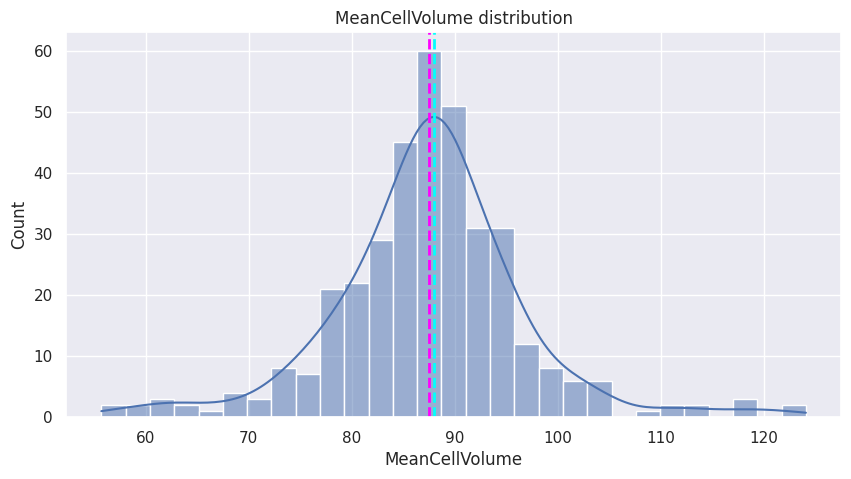

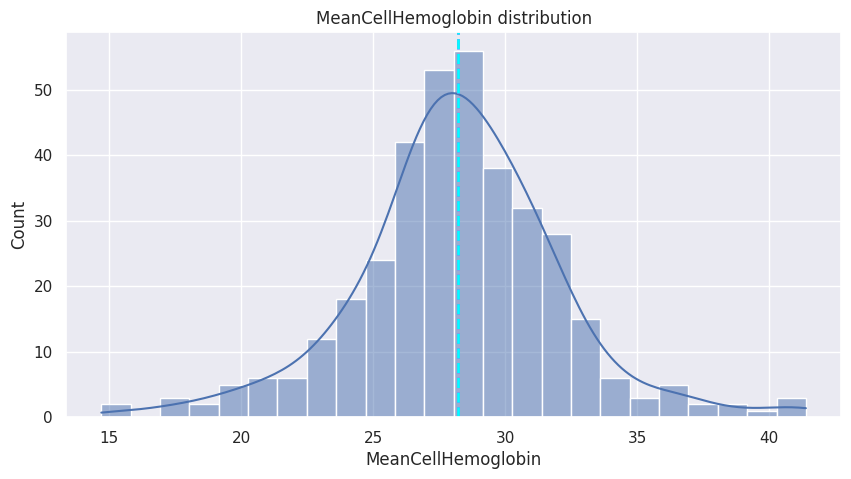

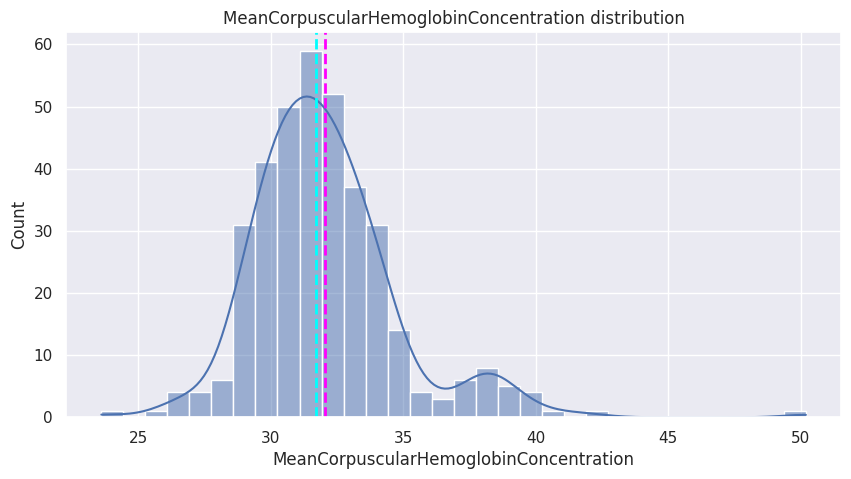

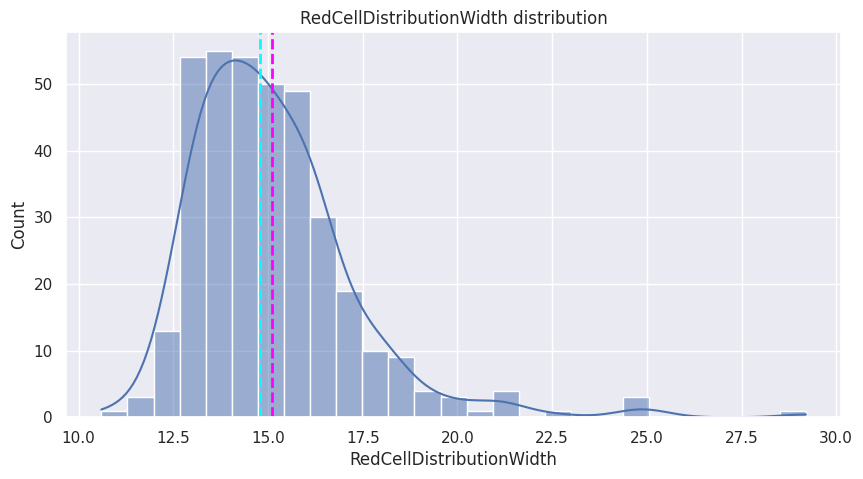

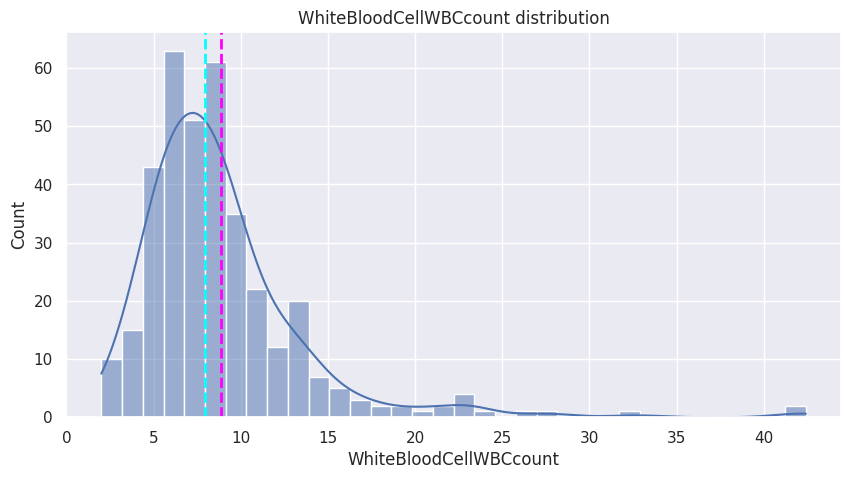

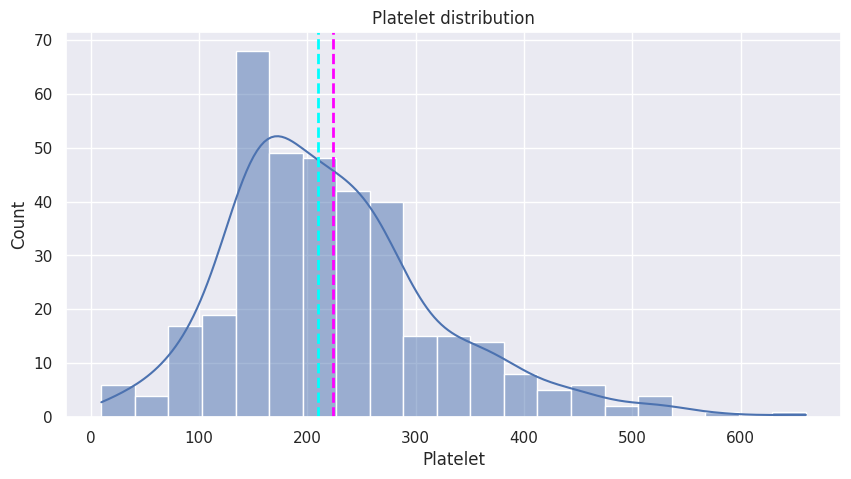

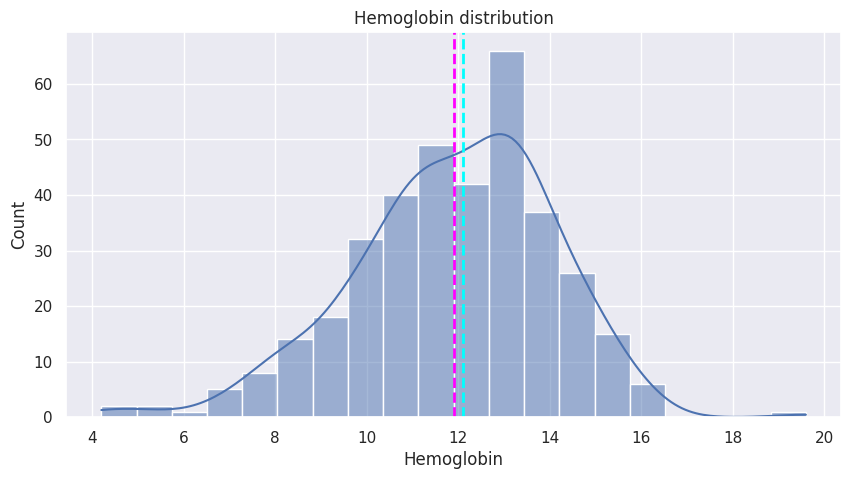

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of variables to plot distributions for
variables = ['PackedCellVolume',
             'MeanCellVolume', 'MeanCellHemoglobin',
             'MeanCorpuscularHemoglobinConcentration',
             'RedCellDistributionWidth', 'WhiteBloodCellWBCcount',
             'Platelet', 'Hemoglobin']

# Convert columns to numeric data type and handle non-numeric values
scd[variables] = scd[variables].apply(pd.to_numeric, errors='coerce')

# Loop through each variable and create a distribution plot
for variable in variables:
    plt.figure(figsize=(10, 5))
    sns.histplot(scd[variable], kde=True)
    plt.axvline(scd[variable].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(scd[variable].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(f'{variable} distribution')
    plt.show()


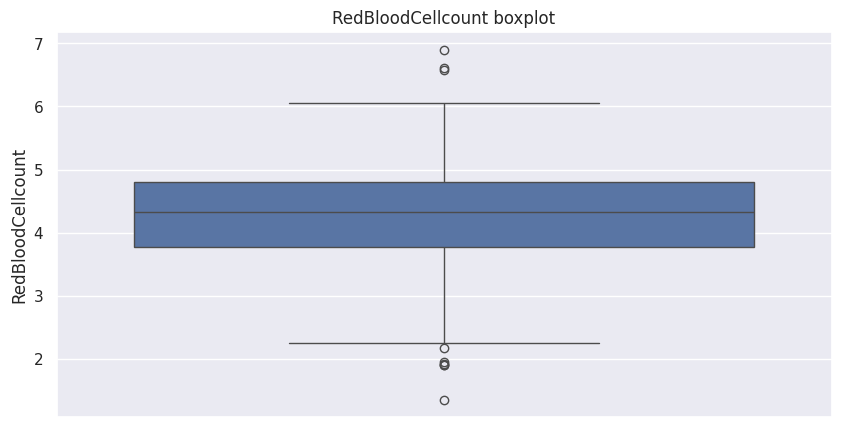

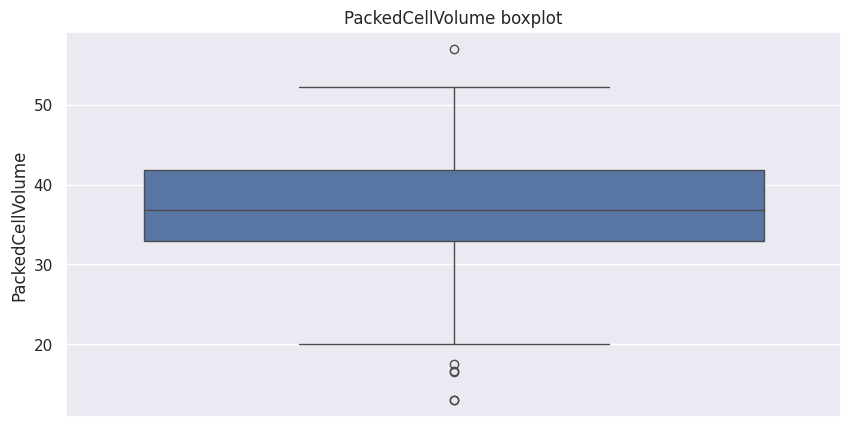

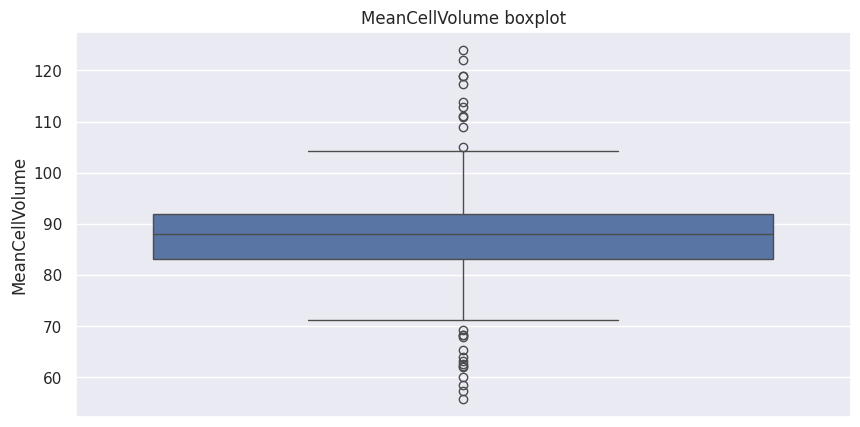

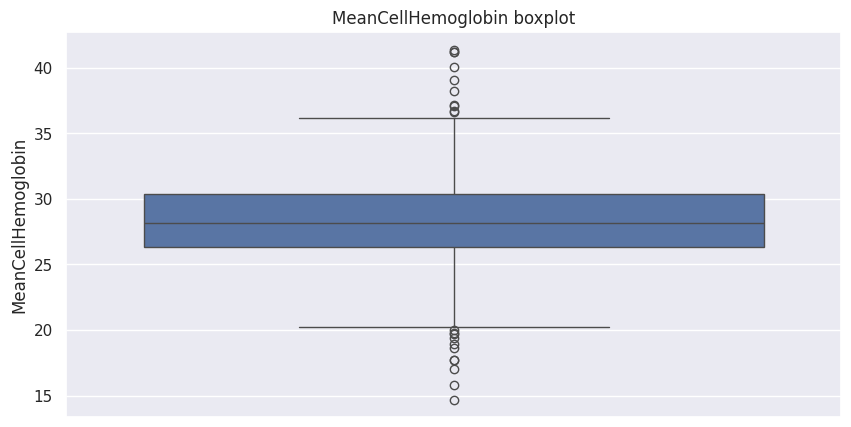

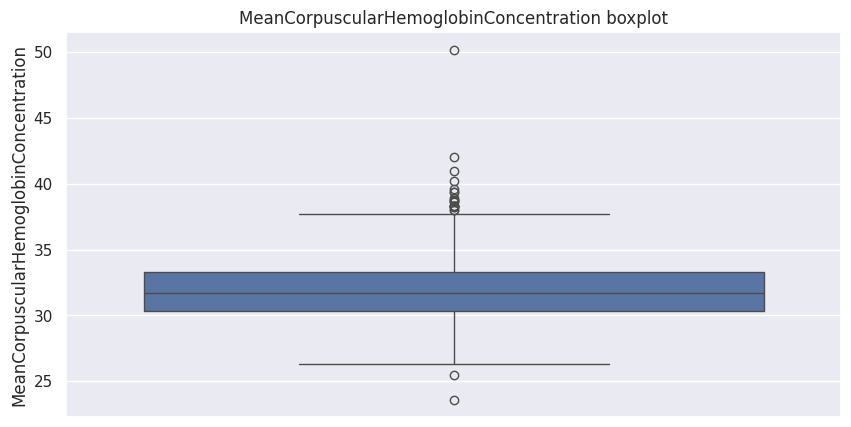

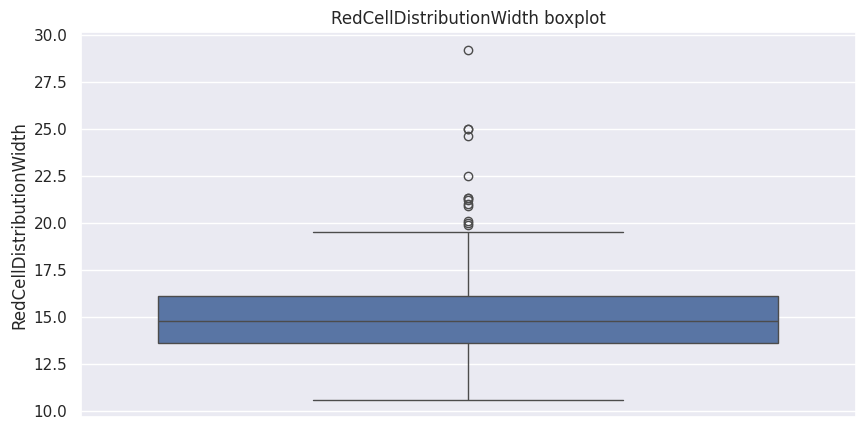

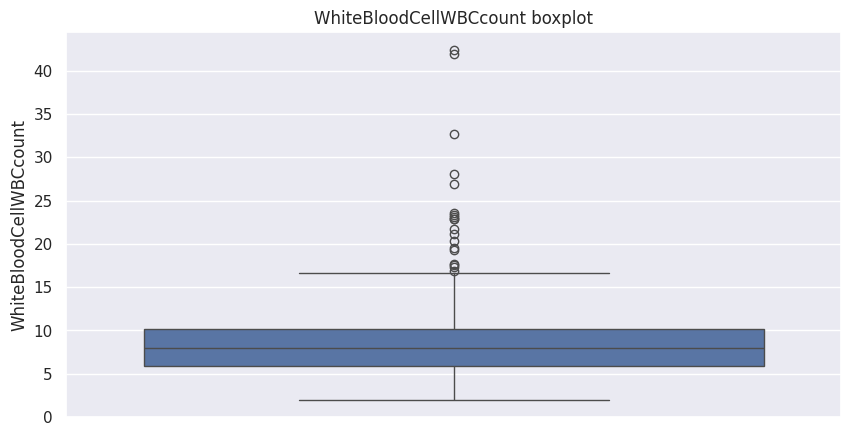

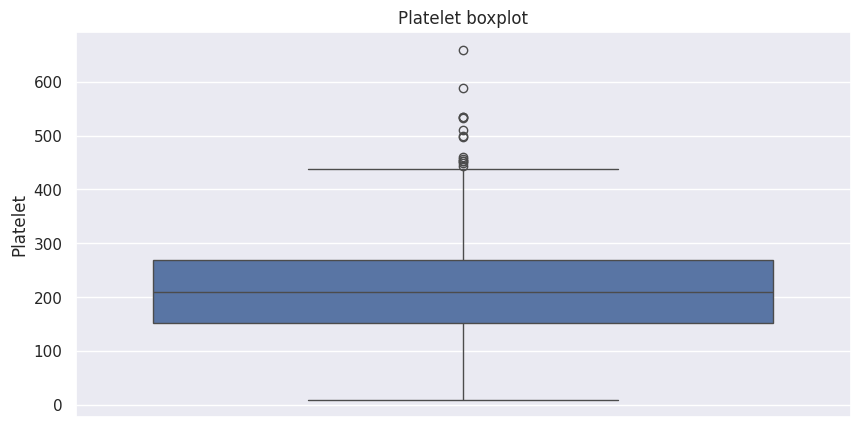

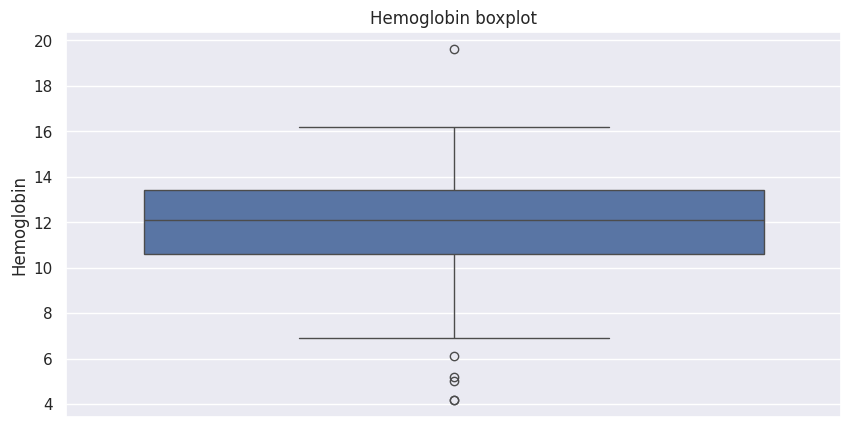

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables to plot boxplots for
variables = [
    'RedBloodCellcount', 'PackedCellVolume',
             'MeanCellVolume', 'MeanCellHemoglobin',
             'MeanCorpuscularHemoglobinConcentration',
             'RedCellDistributionWidth', 'WhiteBloodCellWBCcount',
             'Platelet', 'Hemoglobin'
]

# Loop through each variable and create a boxplot
for variable in variables:
    plt.figure(figsize=(10, 5))
    sns.boxplot(scd[variable])
    plt.title(f'{variable} boxplot')
    plt.show()


In [50]:



# Mean and median
import pandas as pd

# Assuming scd is the DataFrame containing your data

# List of columns you want to calculate mean and median for
columns_to_calculate = [
    'PackedCellVolume',
             'MeanCellVolume', 'MeanCellHemoglobin',
             'MeanCorpuscularHemoglobinConcentration',
             'RedCellDistributionWidth', 'WhiteBloodCellWBCcount',
             'Platelet', 'Hemoglobin'
]

# Calculate mean and median for each column and print the results
for column in columns_to_calculate:
    mean_value = scd[column].mean()
    median_value = scd[column].median()

    # Print the mean and median for the column
    print(f"For '{column}':")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print()


For 'PackedCellVolume':
Mean: 36.76291208791209
Median: 36.8

For 'MeanCellVolume':
Mean: 87.50912087912087
Median: 87.95

For 'MeanCellHemoglobin':
Mean: 28.22714285714286
Median: 28.2

For 'MeanCorpuscularHemoglobinConcentration':
Mean: 32.05340659340659
Median: 31.7

For 'RedCellDistributionWidth':
Mean: 15.116510989010989
Median: 14.8

For 'WhiteBloodCellWBCcount':
Mean: 8.86357142857143
Median: 7.9350000000000005

For 'Platelet':
Mean: 223.7508241758242
Median: 210.0

For 'Hemoglobin':
Mean: 11.907692307692306
Median: 12.1



In [51]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
scd['MeanCellVolume'] = scd['MeanCellVolume'].fillna(scd['MeanCellVolume'].median())
scd['Hemoglobin'] = scd['Hemoglobin'].fillna(scd['Hemoglobin'].median())
scd['MeanCellHemoglobin'] = scd['MeanCellHemoglobin'].fillna(scd['MeanCellHemoglobin'].median())

In [52]:
# mean and median of Red_Cell_Distribution_Width after median imputation
scd.RedCellDistributionWidth.mean(),scd.RedCellDistributionWidth.median()

(15.116510989010989, 14.8)

In [53]:
# mean and median of Mean_Corpuscular_Hemoglobin_Concentration after median imputation
scd.MeanCorpuscularHemoglobinConcentration.mean(),scd.MeanCorpuscularHemoglobinConcentration.median()

(32.05340659340659, 31.7)

In [54]:
# mean and median of Hemoglobin after median imputation
scd.Hemoglobin.mean(),scd.Hemoglobin.median()

(11.91283422459893, 12.1)

In [55]:
# mean and median of Mean_Cell_Hemoglobin after median imputation
scd.MeanCellHemoglobin.mean(),scd.MeanCellHemoglobin.median()

(28.226417112299455, 28.2)

In [56]:
# total missing values in Mean_Corpuscular_Hemoglobin_Concentration
scd.MeanCorpuscularHemoglobinConcentration.isna().sum()

10

In [57]:
# total missing values in Mean_Cell_Hemoglobin
scd.MeanCellHemoglobin.isna().sum()

0

In [58]:
# total missing values in Hemoglobin
scd.Hemoglobin.isna().sum()

0

In [59]:
# total missing values in PLT_/mm3
scd['Platelet'].isna().sum()

10

In [60]:
# total missing values in White_Blood_Cell_(WBC_count)
scd['WhiteBloodCellWBCcount'].isna().sum()

10

In [61]:
# total missing values in Red_Cell_Distribution_Width
scd['RedCellDistributionWidth'].isna().sum()

10

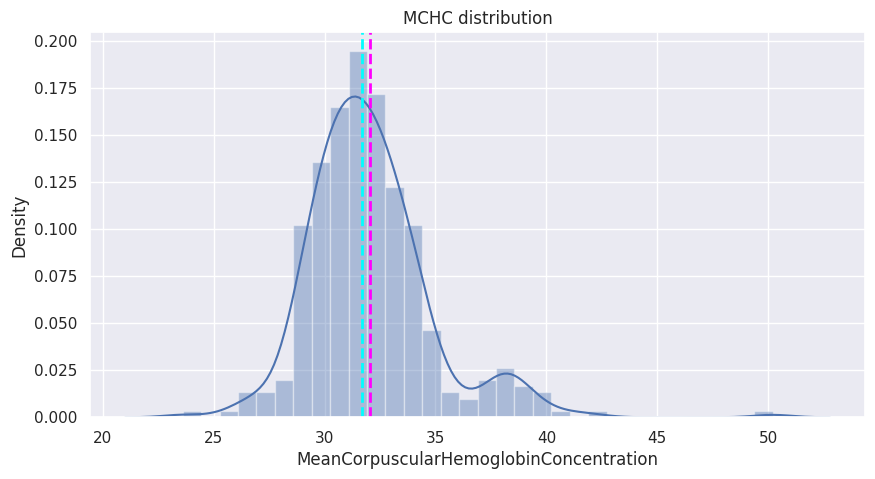

In [62]:
# distribution of Mean_Corpuscular_Hemoglobin_Concentration
plt.figure(figsize=(10,5))
sns.distplot(scd['MeanCorpuscularHemoglobinConcentration'])
plt.axvline(scd['MeanCorpuscularHemoglobinConcentration'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(scd['MeanCorpuscularHemoglobinConcentration'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('MCHC distribution')
plt.show()

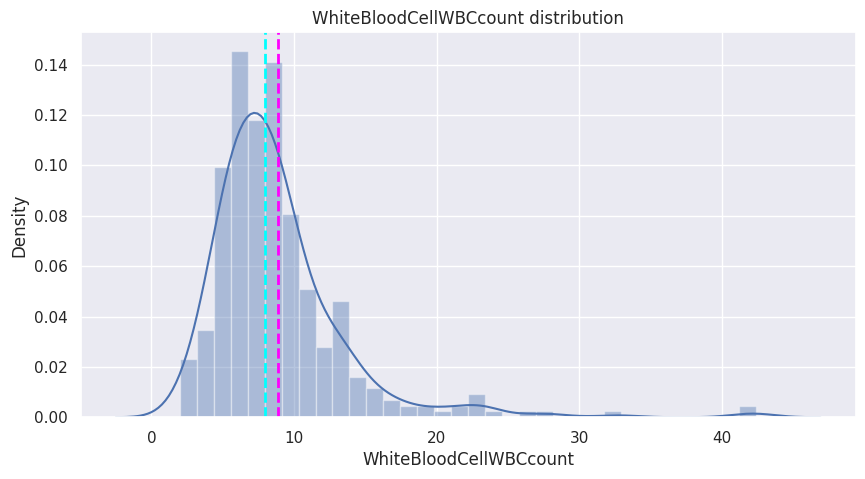

In [63]:
# distribution of White_Blood_Cell_(WBC_count)
plt.figure(figsize=(10,5))
sns.distplot(scd['WhiteBloodCellWBCcount'])
plt.axvline(scd['WhiteBloodCellWBCcount'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(scd['WhiteBloodCellWBCcount'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('WhiteBloodCellWBCcount distribution')
plt.show()

Text(0.5, 1.0, 'MCHC boxplot')

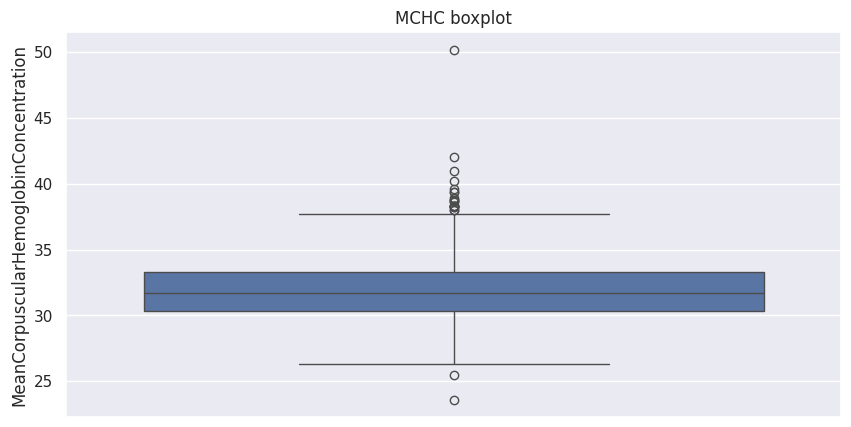

In [64]:
# Outliers in Mean_Corpuscular_Hemoglobin_Concentration
plt.figure(figsize=(10,5))
sns.boxplot(scd['MeanCorpuscularHemoglobinConcentration'])
plt.title('MCHC boxplot')

In [65]:
# Mean, median, and mode for Mean_Corpuscular_Hemoglobin_Concentration
scd.MeanCorpuscularHemoglobinConcentration.mean(),scd.MeanCorpuscularHemoglobinConcentration.median(),scd.MeanCorpuscularHemoglobinConcentration.mode()

(32.05340659340659,
 31.7,
 0    30.3
 1    32.4
 Name: MeanCorpuscularHemoglobinConcentration, dtype: float64)

In [66]:
# Mean, median, and mode for White_Blood_Cell_(WBC_count)
scd['WhiteBloodCellWBCcount'].mean(), scd['WhiteBloodCellWBCcount'].median(), scd['WhiteBloodCellWBCcount'].mode()


(8.86357142857143,
 7.9350000000000005,
 0    8.4
 Name: WhiteBloodCellWBCcount, dtype: float64)

In [67]:
# Mean, median, and mode for Mean_Cell_Hemoglobin
scd['MeanCellHemoglobin'].mean(), scd['MeanCellHemoglobin'].median(), scd['MeanCellHemoglobin'].mode()

(28.226417112299455,
 28.2,
 0    28.2
 Name: MeanCellHemoglobin, dtype: float64)

In [68]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(scd)
scd = pd.DataFrame(imputed, columns=scd.columns)

In [69]:
# mean, median, and mode for Mean_Corpuscular_Hemoglobin_Concentration after knn imputation
scd.MeanCorpuscularHemoglobinConcentration.mean(),scd.MeanCorpuscularHemoglobinConcentration.median(),scd.MeanCorpuscularHemoglobinConcentration.mode()

(32.0407486631016,
 31.6,
 0    30.30
 1    31.58
 2    32.40
 Name: MeanCorpuscularHemoglobinConcentration, dtype: float64)

In [70]:
scd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     374 non-null    float64
 1   Sex                                     374 non-null    float64
 2   RedBloodCellcount                       374 non-null    float64
 3   PackedCellVolume                        374 non-null    float64
 4   MeanCellVolume                          374 non-null    float64
 5   MeanCellHemoglobin                      374 non-null    float64
 6   MeanCorpuscularHemoglobinConcentration  374 non-null    float64
 7   RedCellDistributionWidth                374 non-null    float64
 8   WhiteBloodCellWBCcount                  374 non-null    float64
 9   Platelet                                374 non-null    float64
 10  Hemoglobin                              374 non-null    float6

In [71]:
# checking for missing values
scd.isna().sum()

Age                                       0
Sex                                       0
RedBloodCellcount                         0
PackedCellVolume                          0
MeanCellVolume                            0
MeanCellHemoglobin                        0
MeanCorpuscularHemoglobinConcentration    0
RedCellDistributionWidth                  0
WhiteBloodCellWBCcount                    0
Platelet                                  0
Hemoglobin                                0
ishavingdisease                           0
dtype: int64

# Exploratory Data Analysis

Dependent Variable

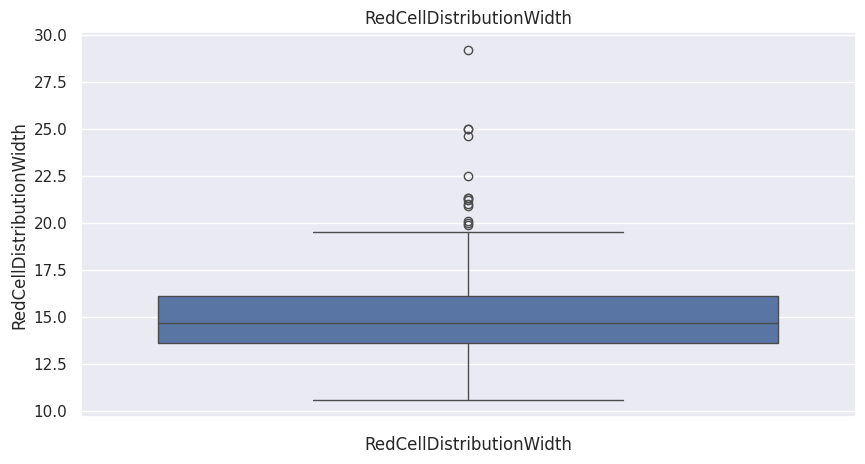

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of dependent variable
plt.figure(figsize=(10,5))
sns.boxplot(scd['RedCellDistributionWidth'])
plt.xlabel('RedCellDistributionWidth')
plt.title('RedCellDistributionWidth')
plt.show()

In [73]:
print(scd.columns)

Index(['Age', 'Sex', 'RedBloodCellcount', 'PackedCellVolume', 'MeanCellVolume',
       'MeanCellHemoglobin', 'MeanCorpuscularHemoglobinConcentration',
       'RedCellDistributionWidth', 'WhiteBloodCellWBCcount', 'Platelet',
       'Hemoglobin', 'ishavingdisease'],
      dtype='object')


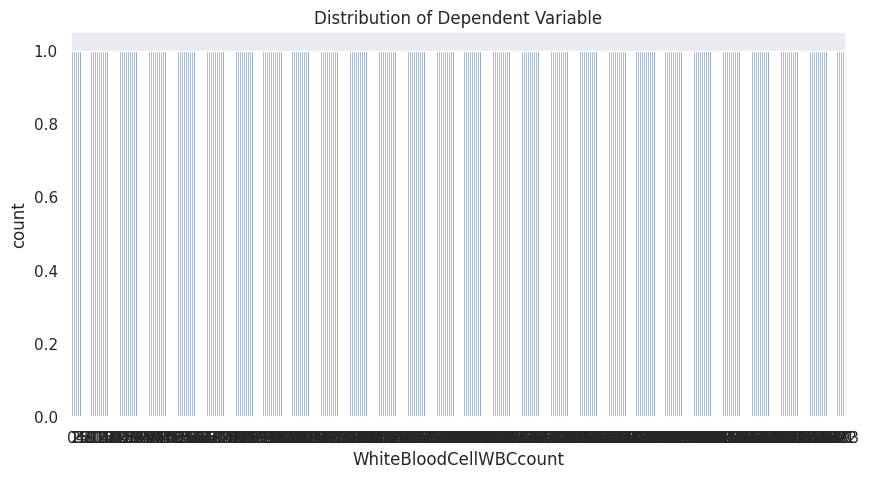

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of dependent variable
plt.figure(figsize=(10,5))
sns.countplot(scd['WhiteBloodCellWBCcount'])  # Replace 'Your_Actual_Dependent_Variable_Column_Name' with the actual column name
plt.xlabel('WhiteBloodCellWBCcount')
plt.title('Distribution of Dependent Variable')
plt.show()


Continuous Independent Variable Distribution

In [75]:
numeric_columns = scd.select_dtypes(include=['int64', 'float64']).columns
continuous_variables = list(numeric_columns)

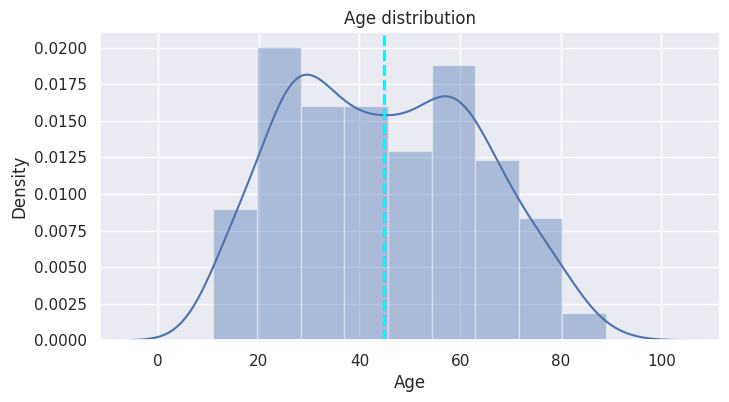

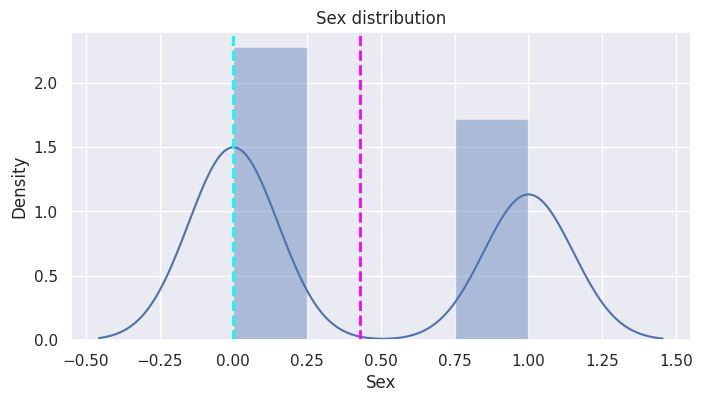

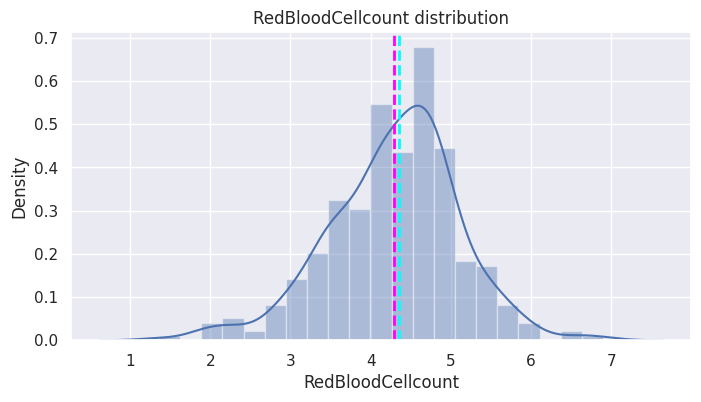

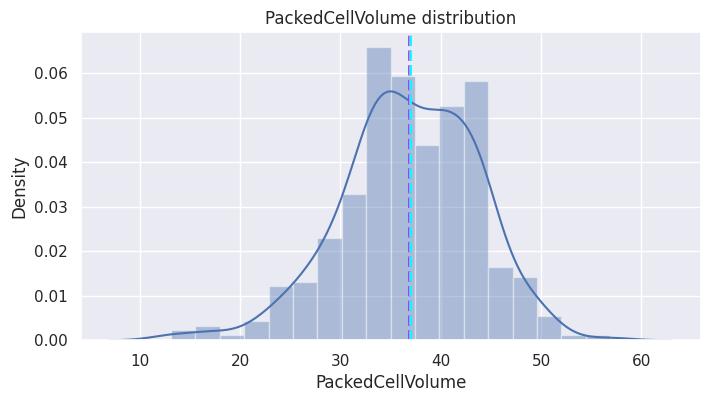

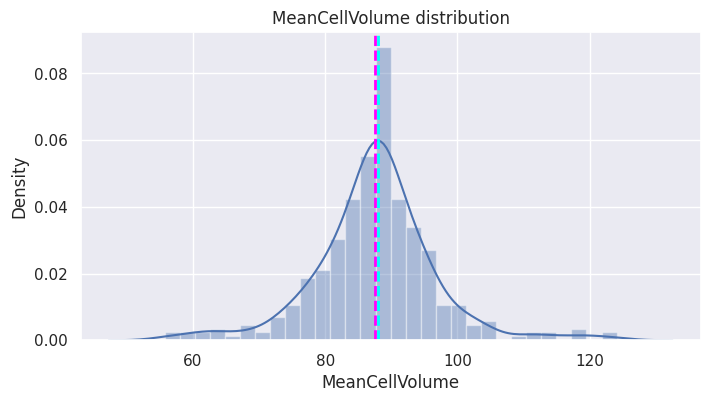

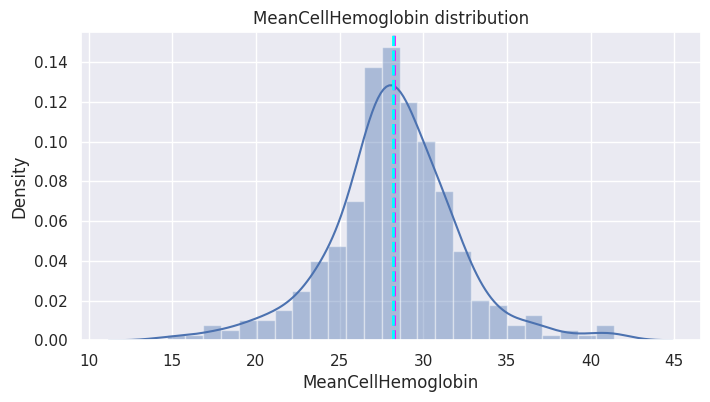

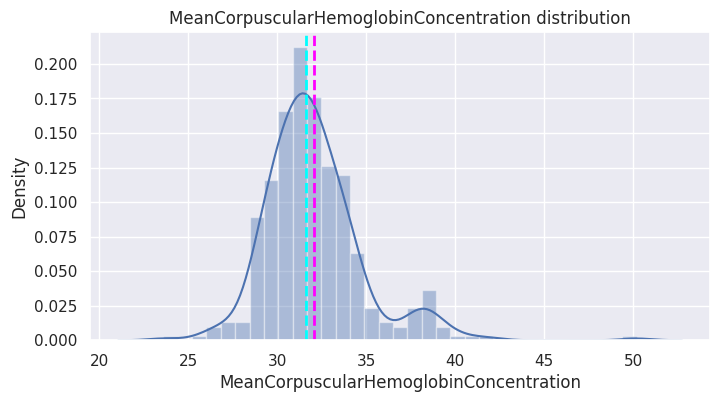

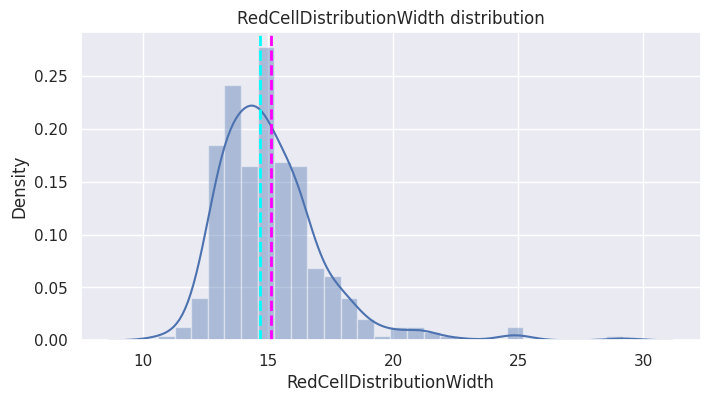

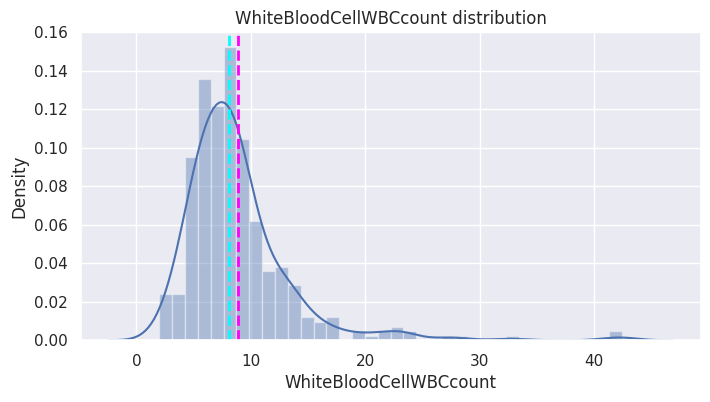

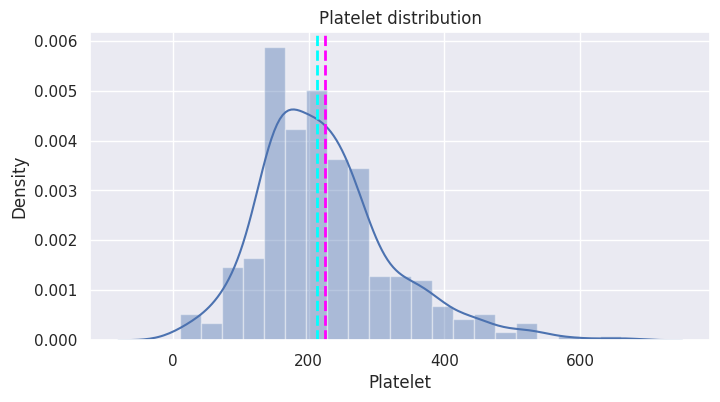

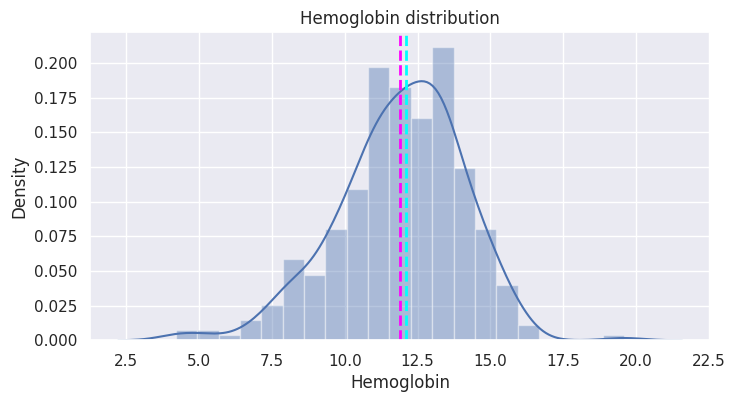

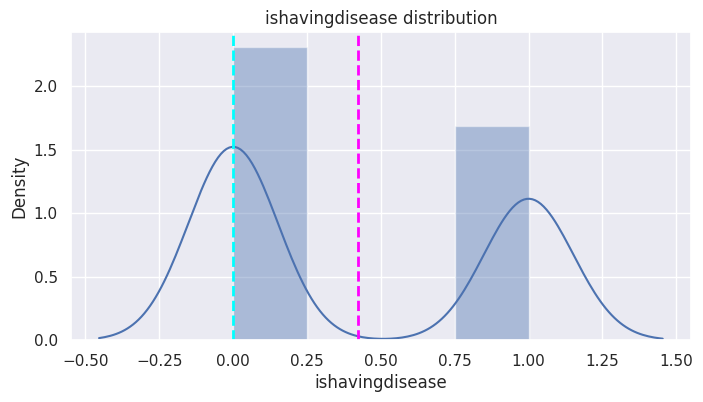

In [76]:
# Analysing the distribution of continuous variables in the dataset
for col in continuous_variables:
    plt.figure(figsize=(8,4))
    sns.distplot(scd[col])
    plt.axvline(scd[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(scd[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(col + ' distribution')
    plt.show()


Relation Between Dependent and continuous independent variables

<Figure size 1000x500 with 0 Axes>

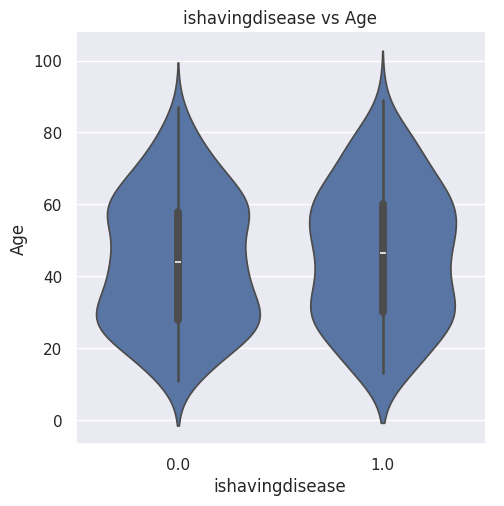

<Figure size 1000x500 with 0 Axes>

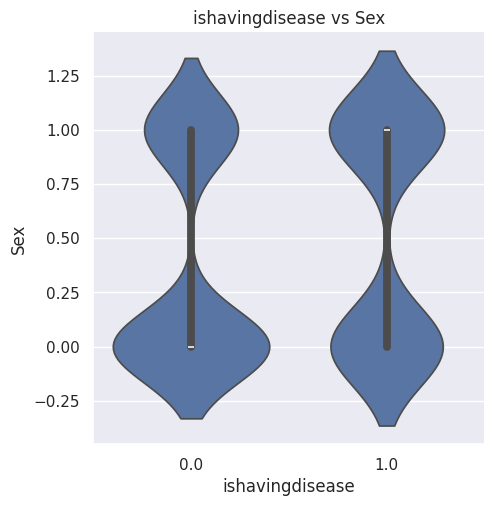

<Figure size 1000x500 with 0 Axes>

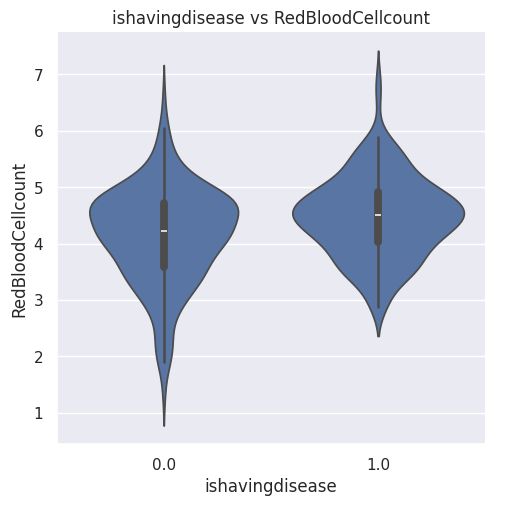

<Figure size 1000x500 with 0 Axes>

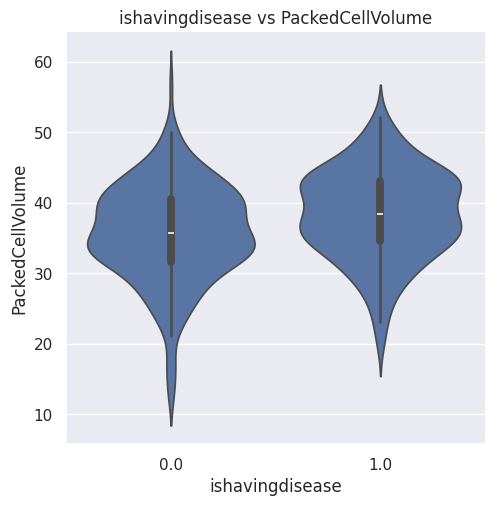

<Figure size 1000x500 with 0 Axes>

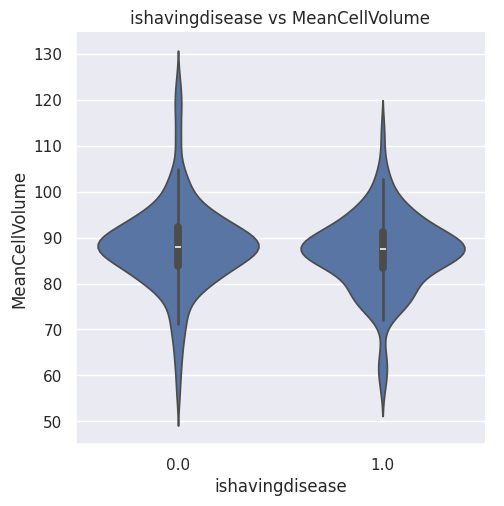

<Figure size 1000x500 with 0 Axes>

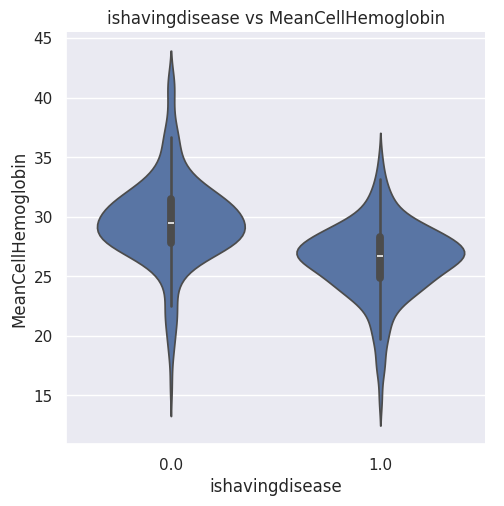

<Figure size 1000x500 with 0 Axes>

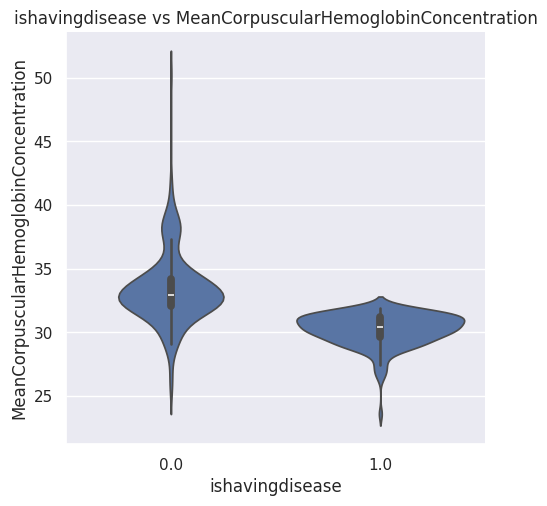

<Figure size 1000x500 with 0 Axes>

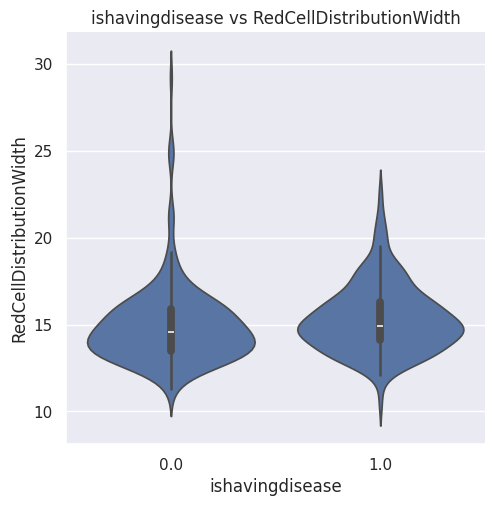

<Figure size 1000x500 with 0 Axes>

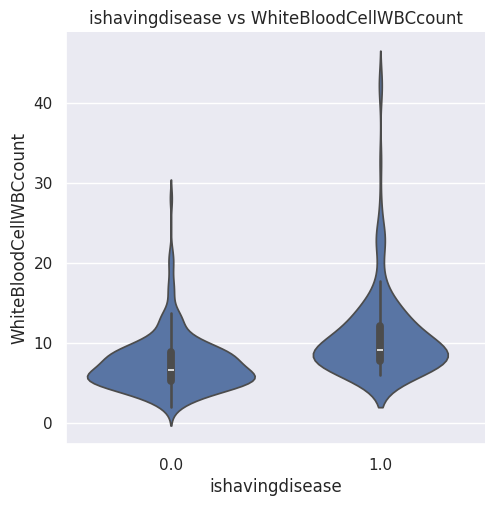

<Figure size 1000x500 with 0 Axes>

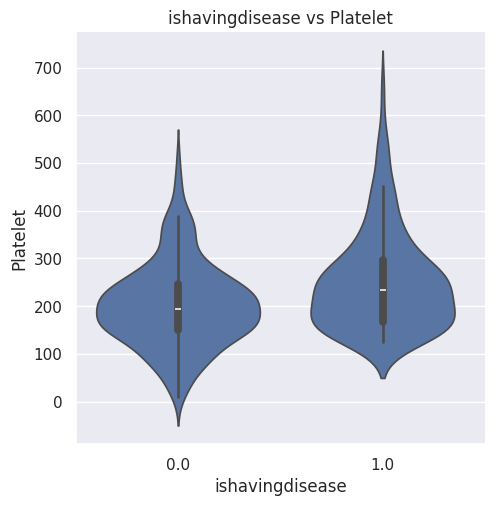

<Figure size 1000x500 with 0 Axes>

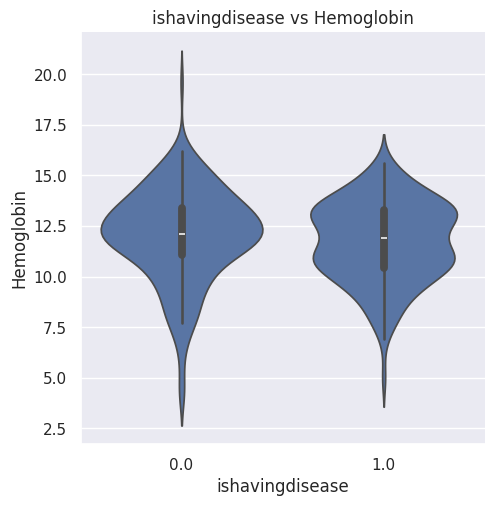

<Figure size 1000x500 with 0 Axes>

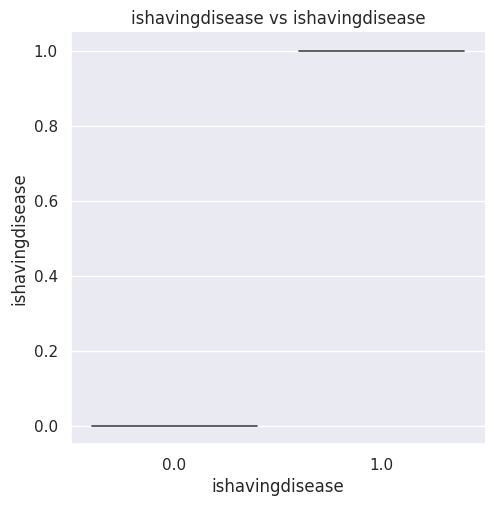

In [77]:
# Relationship between the dependent variable and continuous independent variables
for i in continuous_variables:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_variables[0],y=i,data=scd,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_variables[0])
  plt.title(dependent_variables[0]+' vs '+i)
  plt.show()

relationship b/w dependent and discrete independent variables

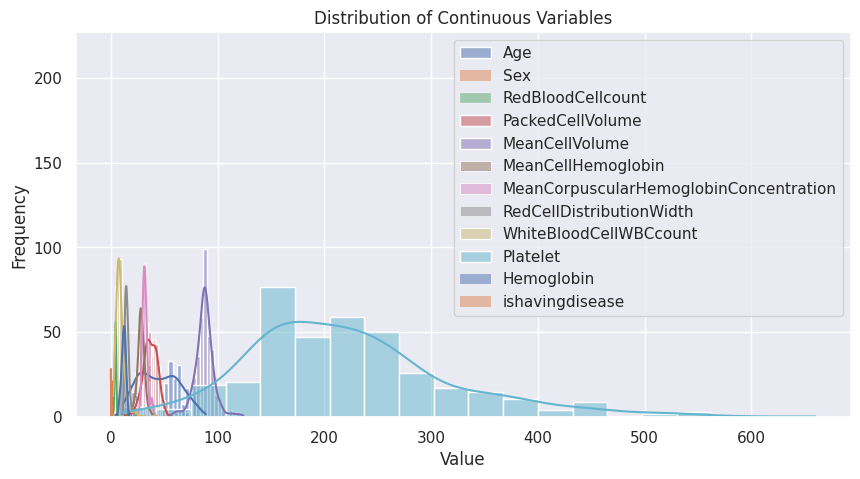

In [78]:
# Define the list of continuous variables
numeric_columns = scd.select_dtypes(include=['int64', 'float64']).columns
continuous_variables = list(numeric_columns)

# Distribution of continuous variables
plt.figure(figsize=(10,5))
for variable in continuous_variables:
    sns.histplot(scd[variable], kde=True, bins=20, label=variable)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Continuous Variables')
plt.legend()
plt.show()


In [79]:
# Distribution of continuous  variable
scd[continuous_variables].value_counts()

Age        Sex  RedBloodCellcount  PackedCellVolume  MeanCellVolume  MeanCellHemoglobin  MeanCorpuscularHemoglobinConcentration  RedCellDistributionWidth  WhiteBloodCellWBCcount  Platelet  Hemoglobin  ishavingdisease
44.917582  0.0  4.717              40.51             87.95           28.2                31.58                                   14.6                      8.389                   221.9     12.1        0.0                10
57.000000  0.0  3.010              31.20             103.70          29.9                28.80                                   25.0                      2.880                   400.0     9.0         0.0                 2
75.000000  0.0  5.550              49.50             89.20           25.8                28.90                                   14.9                      22.900                  151.0     14.3        1.0                 2
57.000000  0.0  5.500              49.60             90.20           28.9                32.10                    

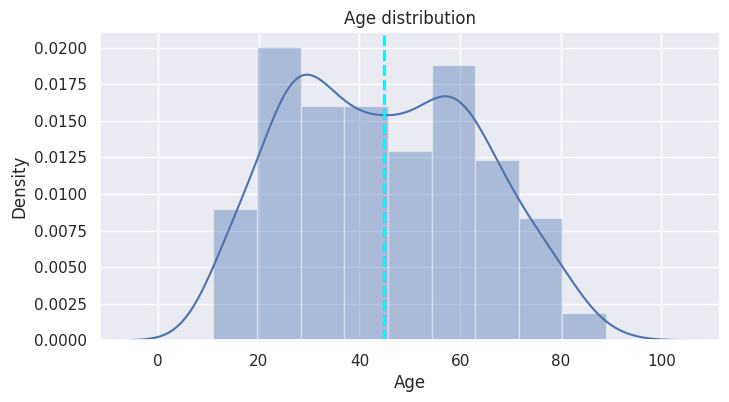

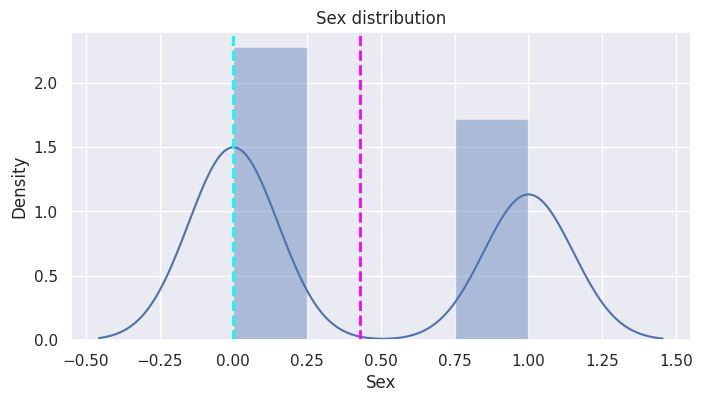

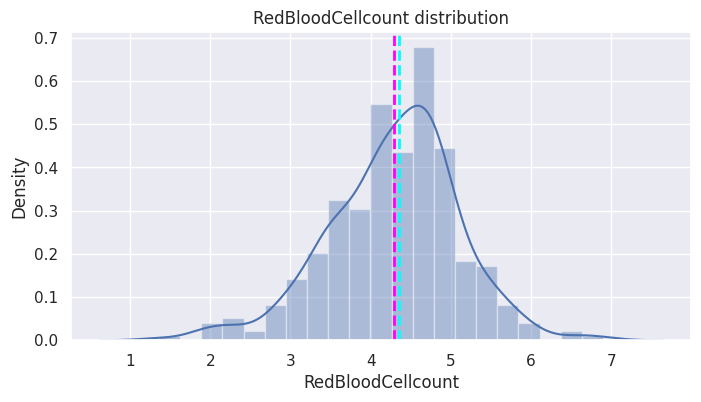

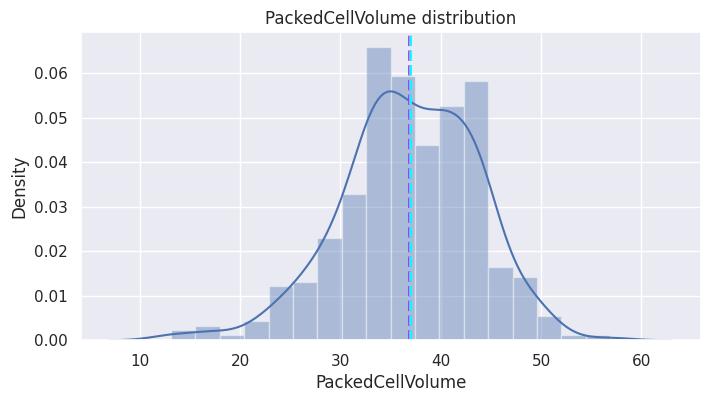

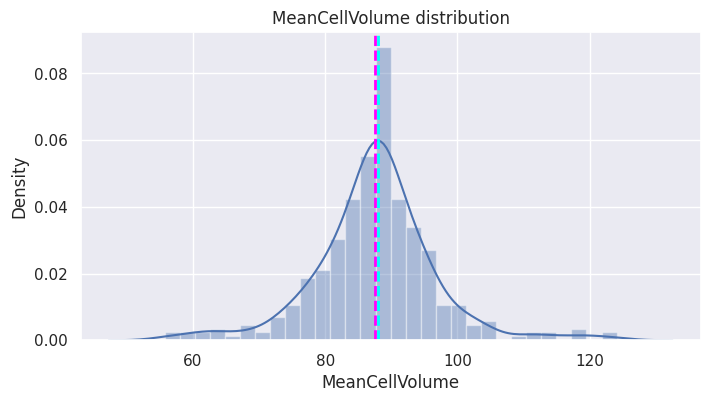

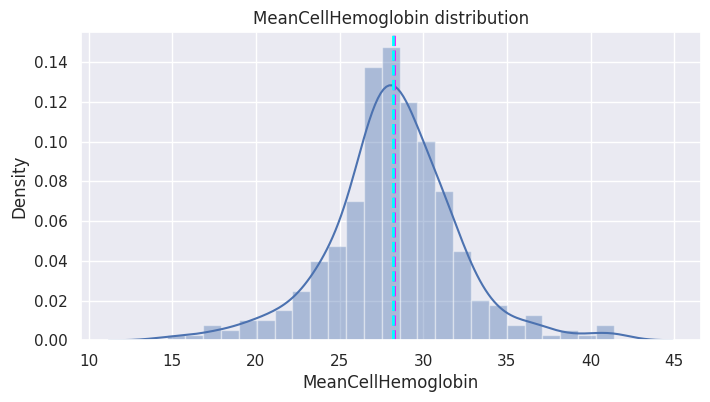

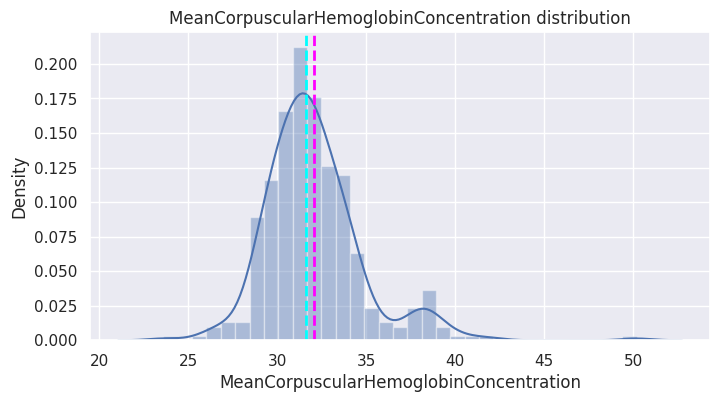

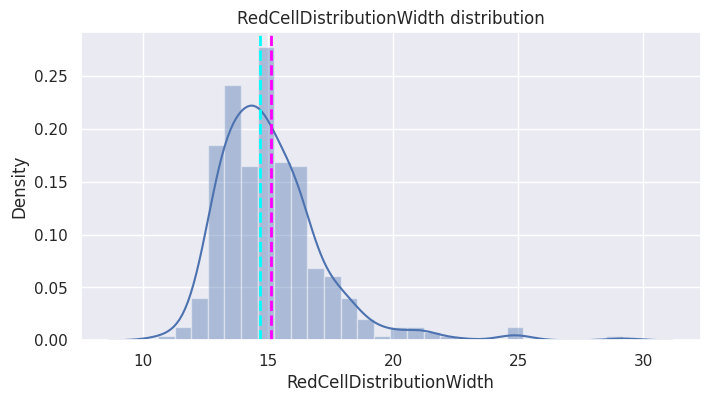

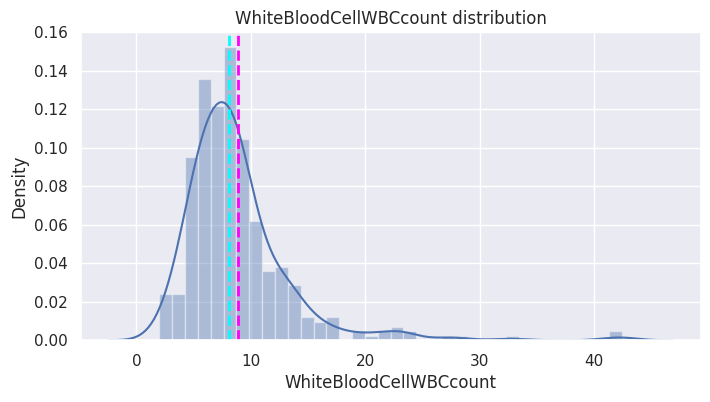

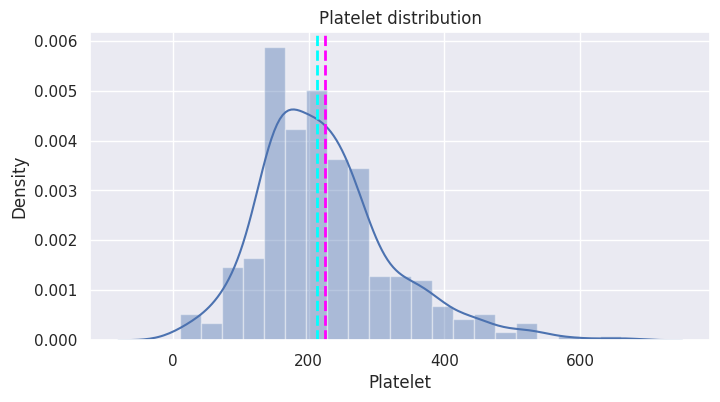

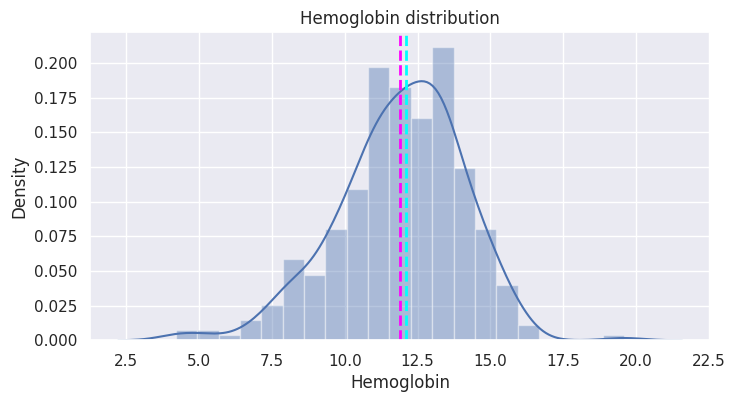

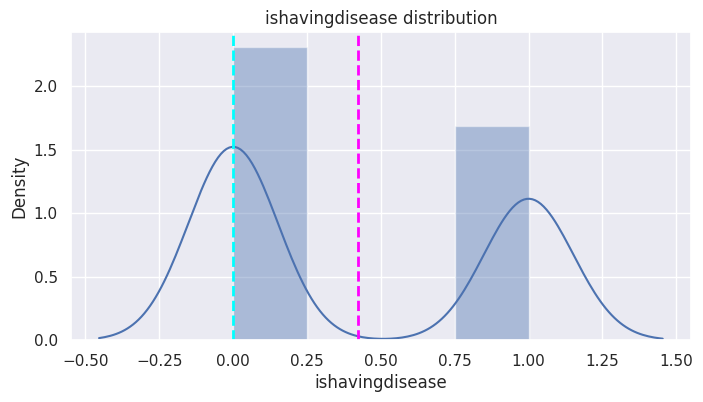

In [80]:
# Analysing the distribution of continuous variables in the dataset
for col in continuous_variables:
  plt.figure(figsize=(8,4))
  sns.distplot(scd[col])
  plt.axvline(scd[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(scd[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

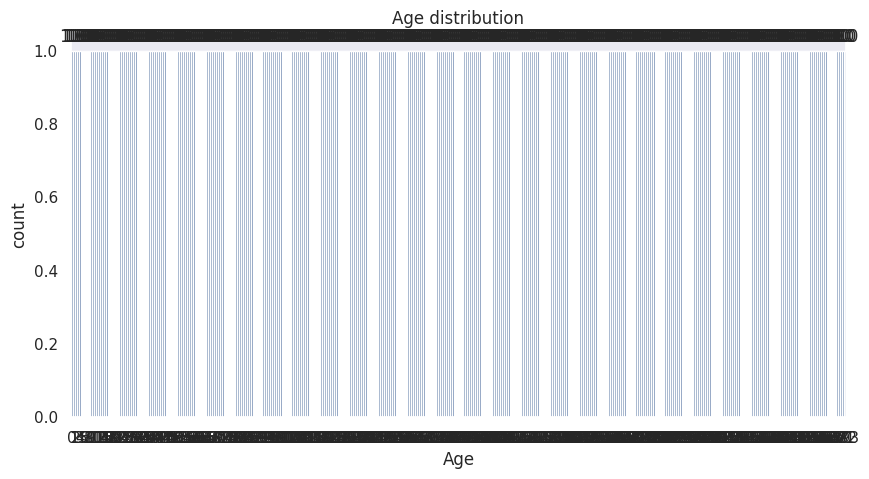

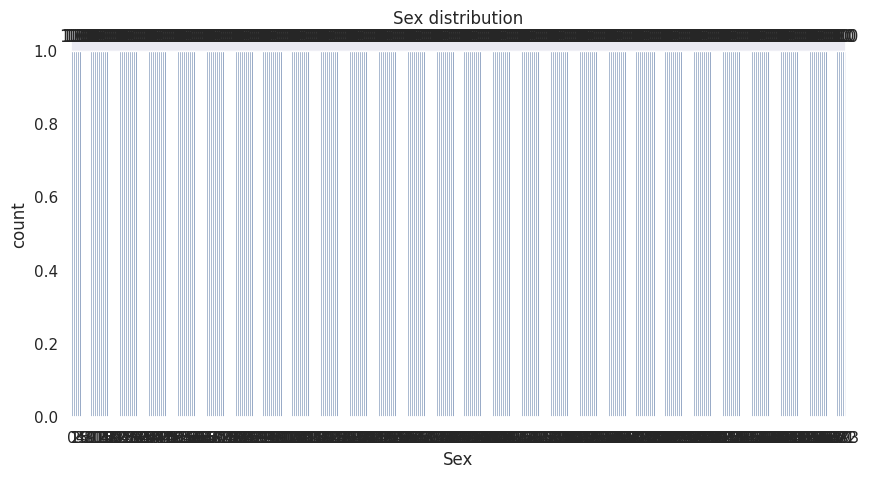

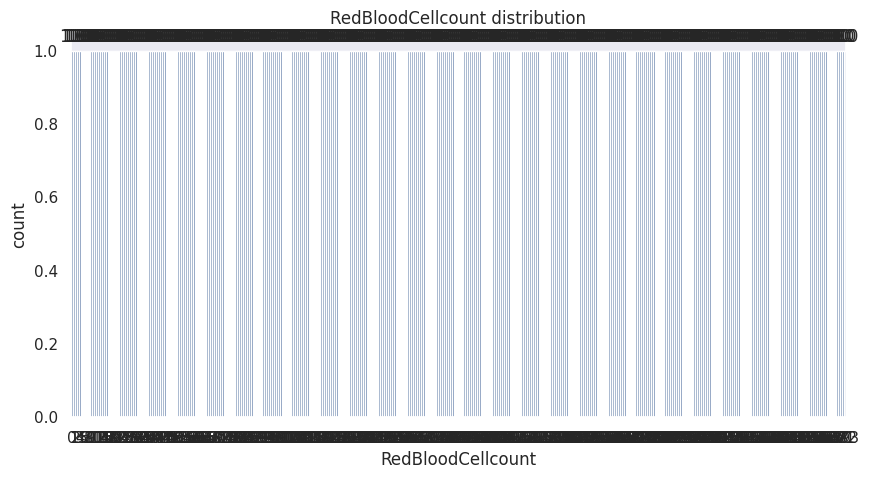

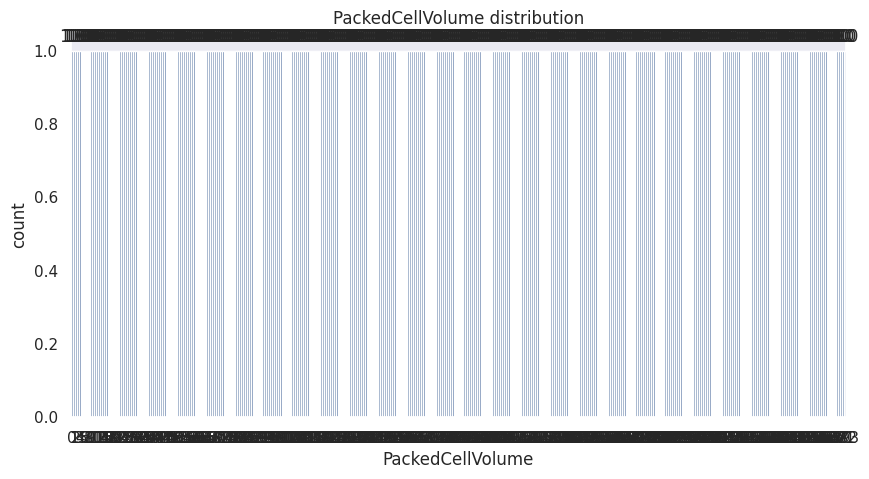

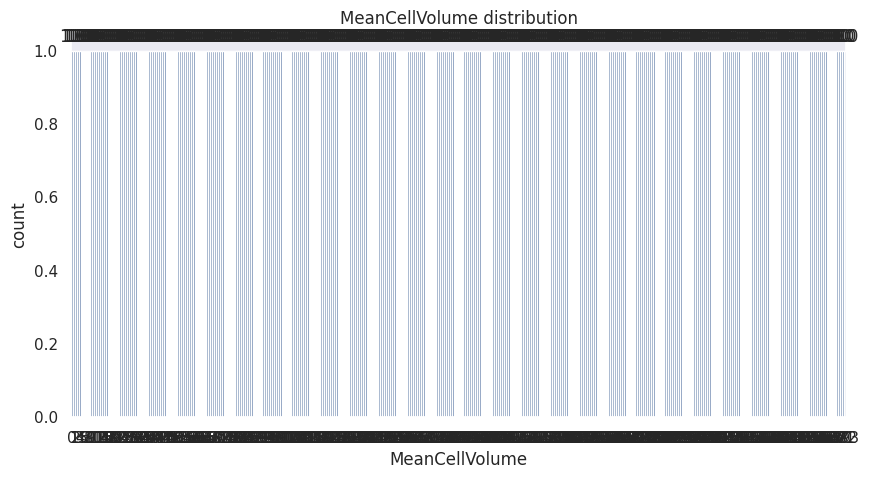

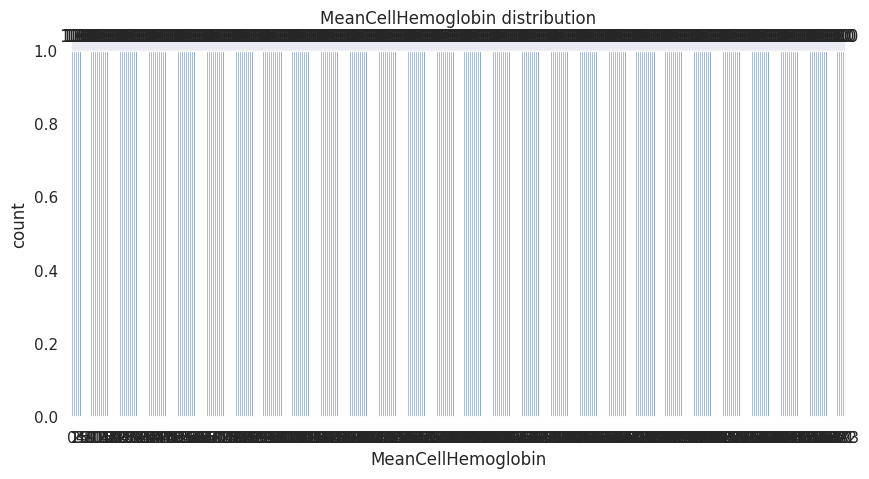

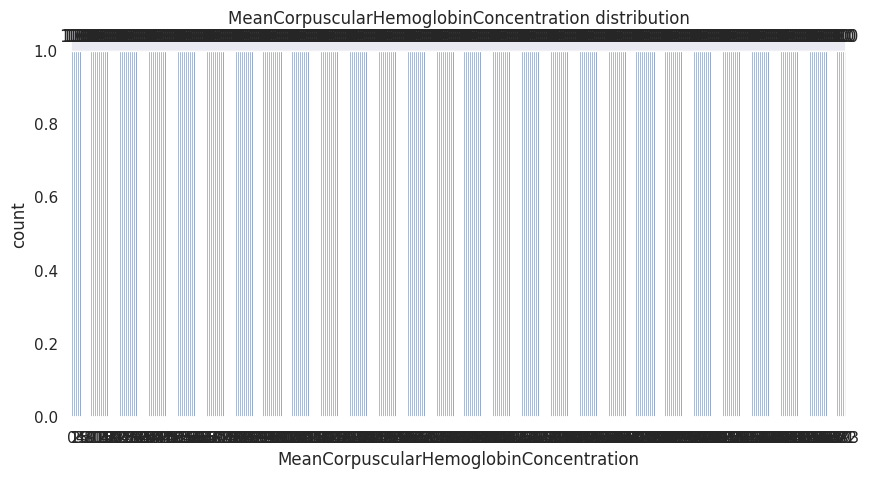

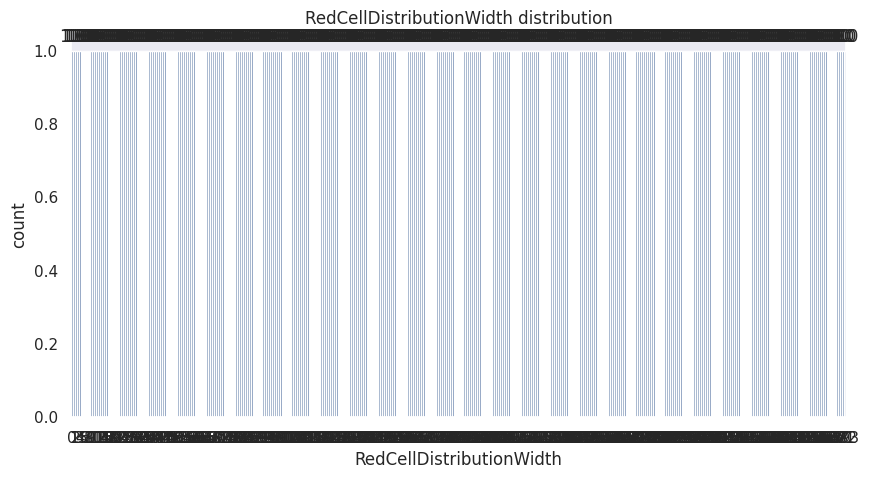

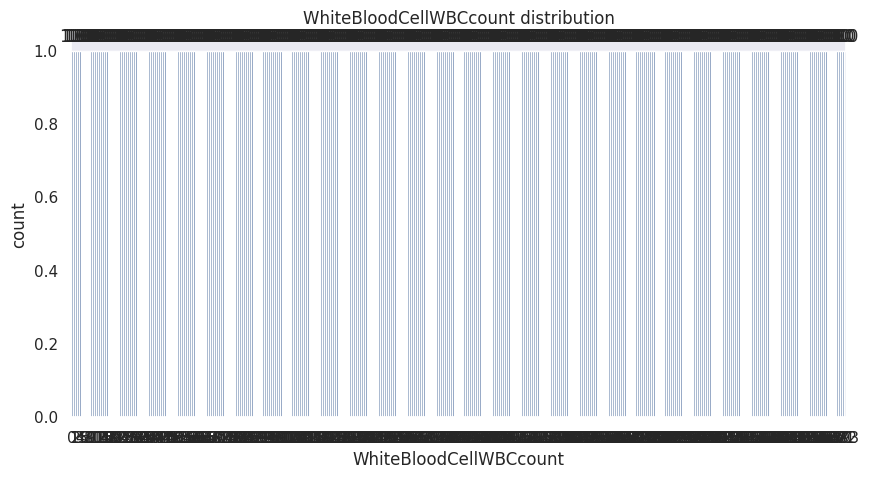

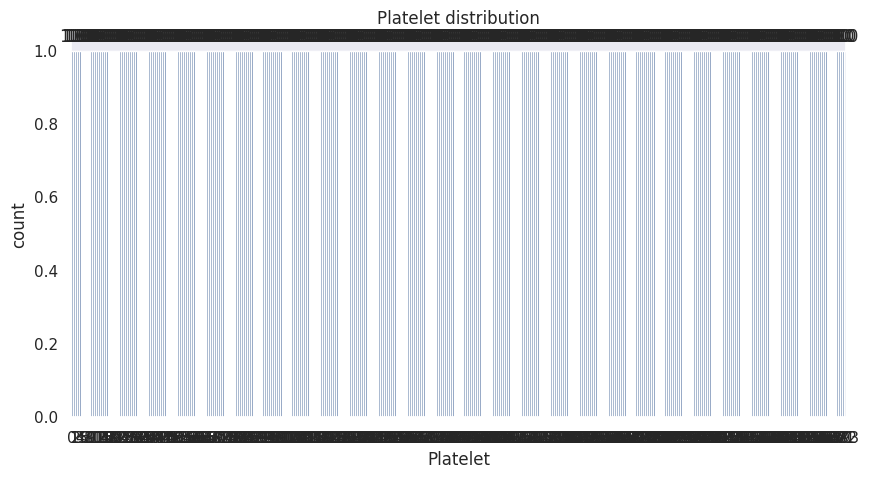

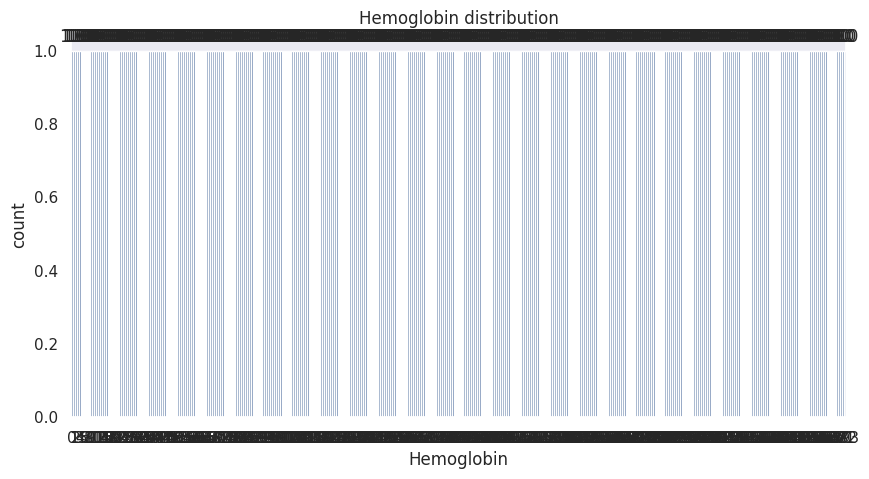

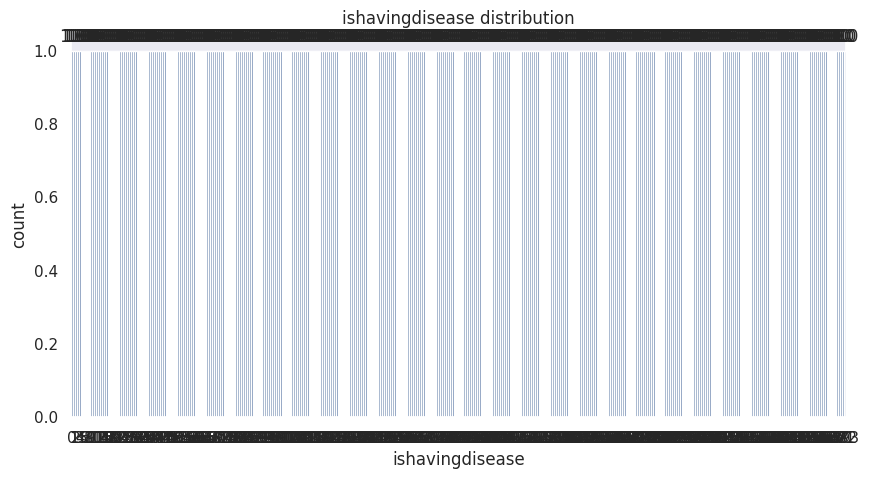

In [81]:
# Analysing the distribution of continuous variables in the dataset
for i in continuous_variables:
  plt.figure(figsize=(10,5))
  p = sns.countplot(scd[i])
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

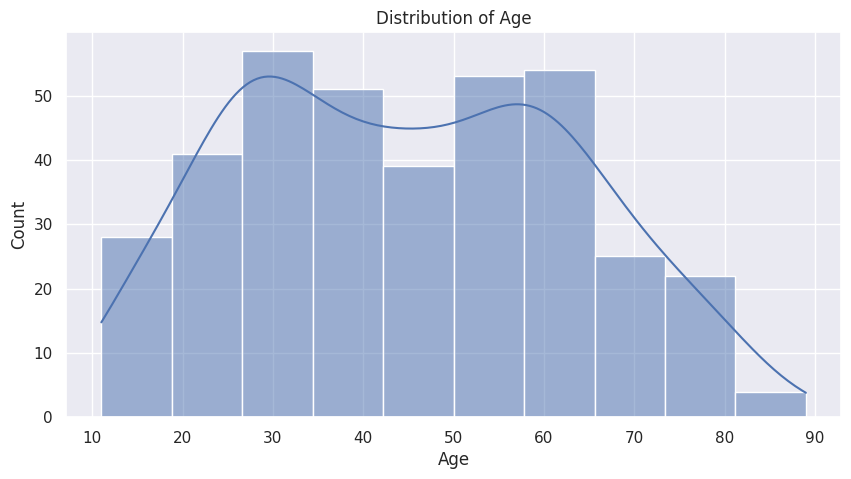

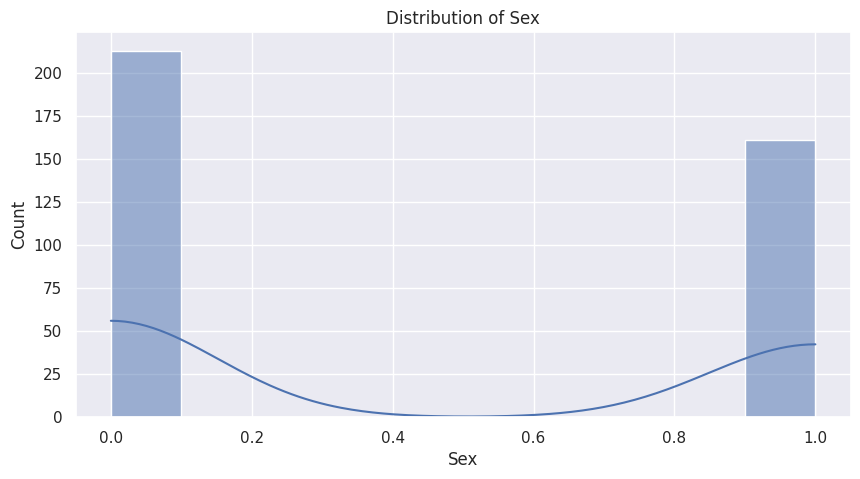

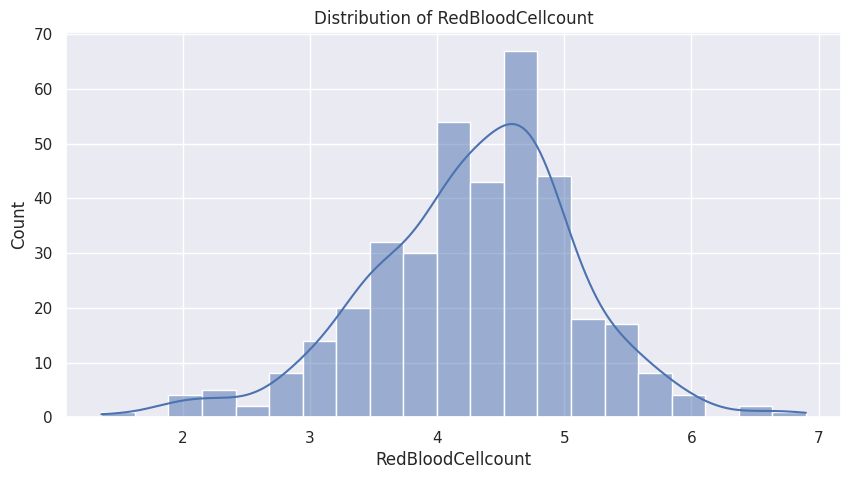

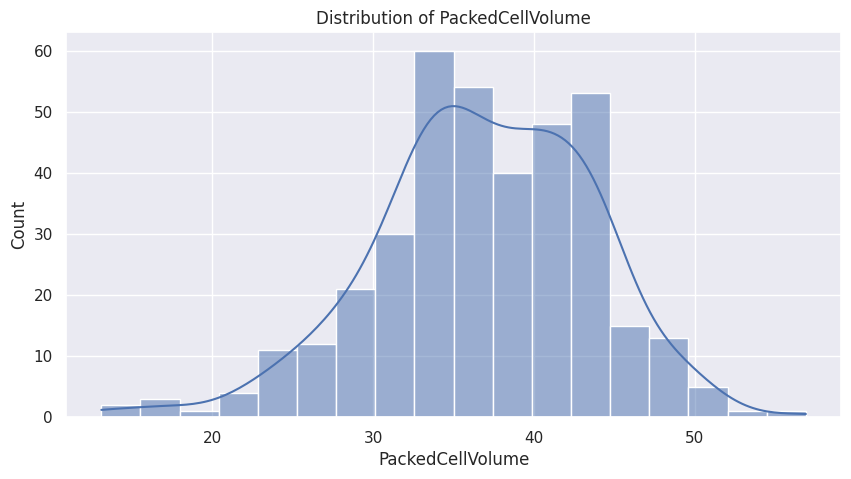

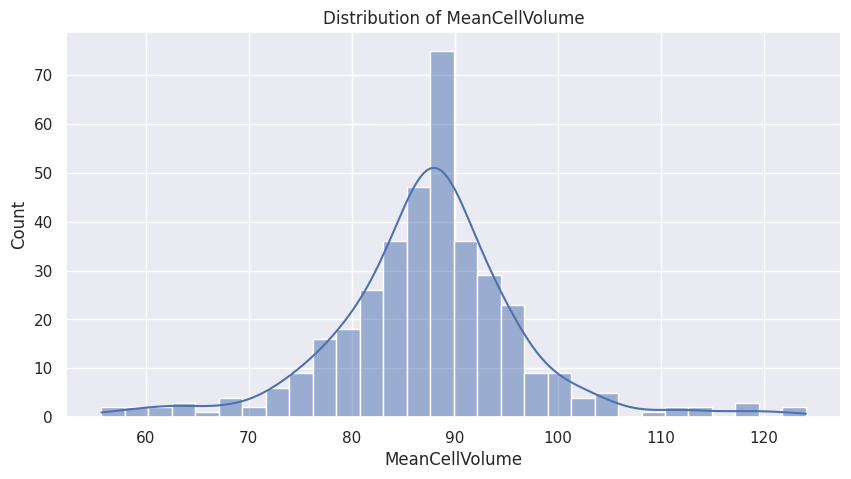

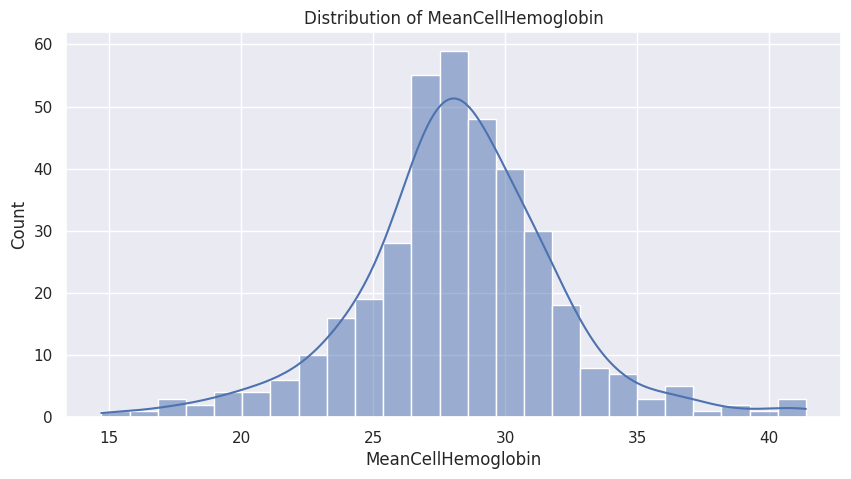

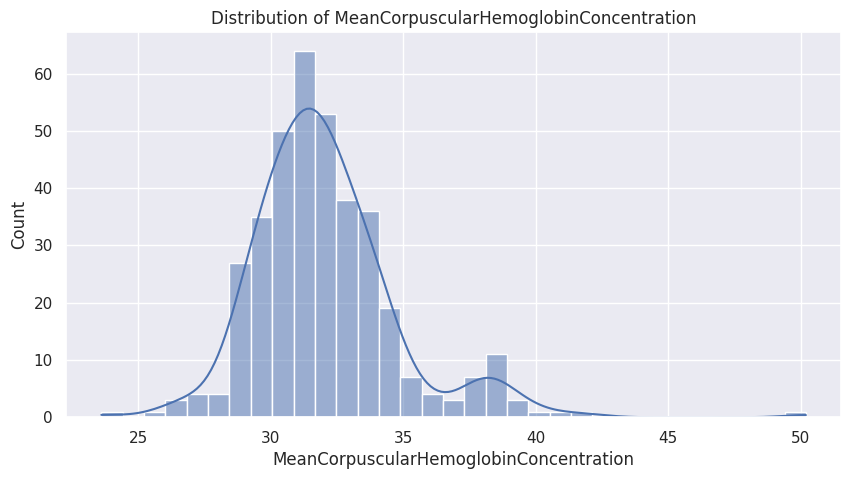

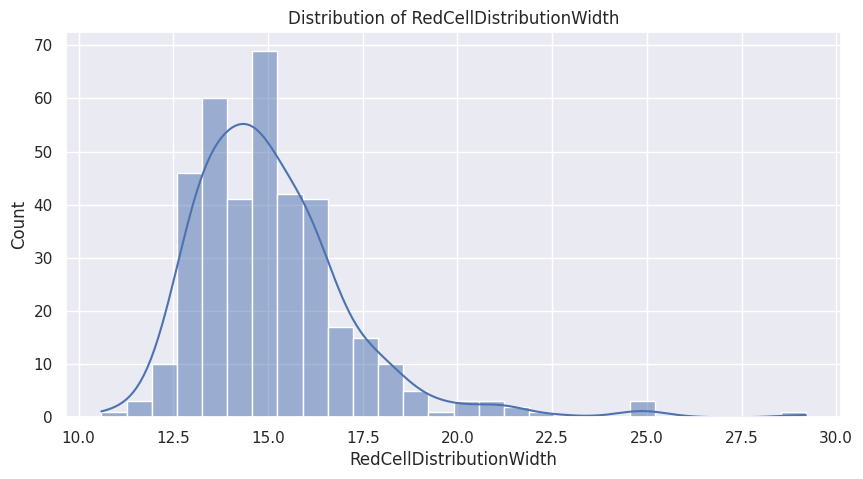

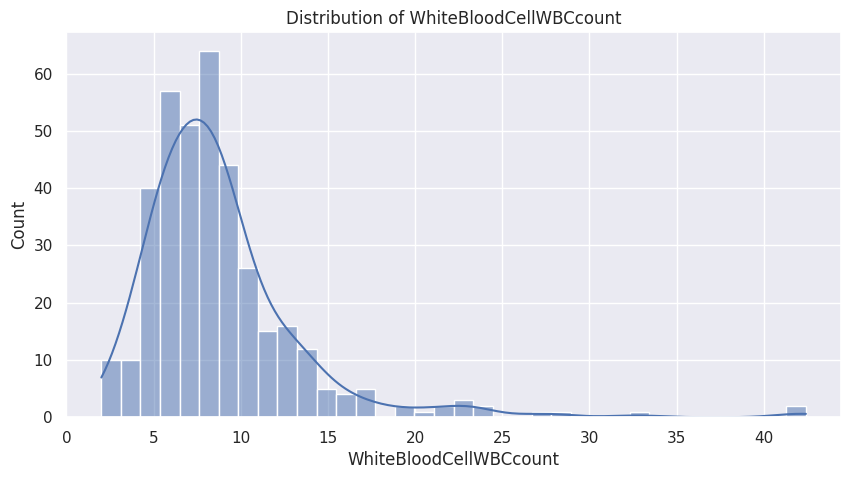

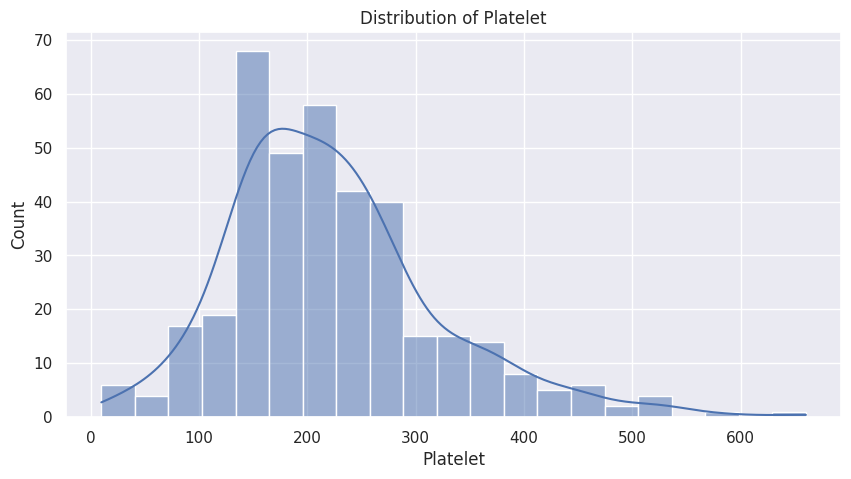

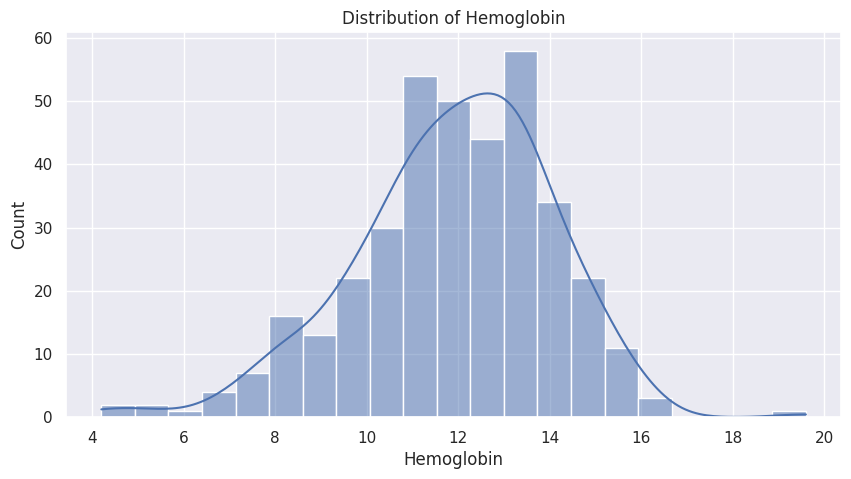

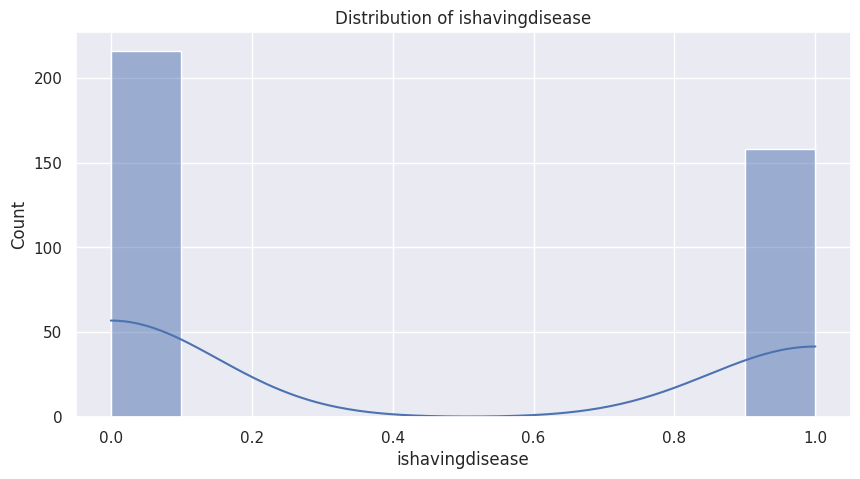

In [82]:
# Analysing the distribution of continuous variables in the dataset
for i in continuous_variables:
    plt.figure(figsize=(10,5))
    sns.histplot(data=scd, x=i, kde=True)
    plt.xlabel(i)
    plt.title(f'Distribution of {i}')
    plt.show()

Correlation Analysis

<Axes: title={'center': 'Correlation Analysis'}>

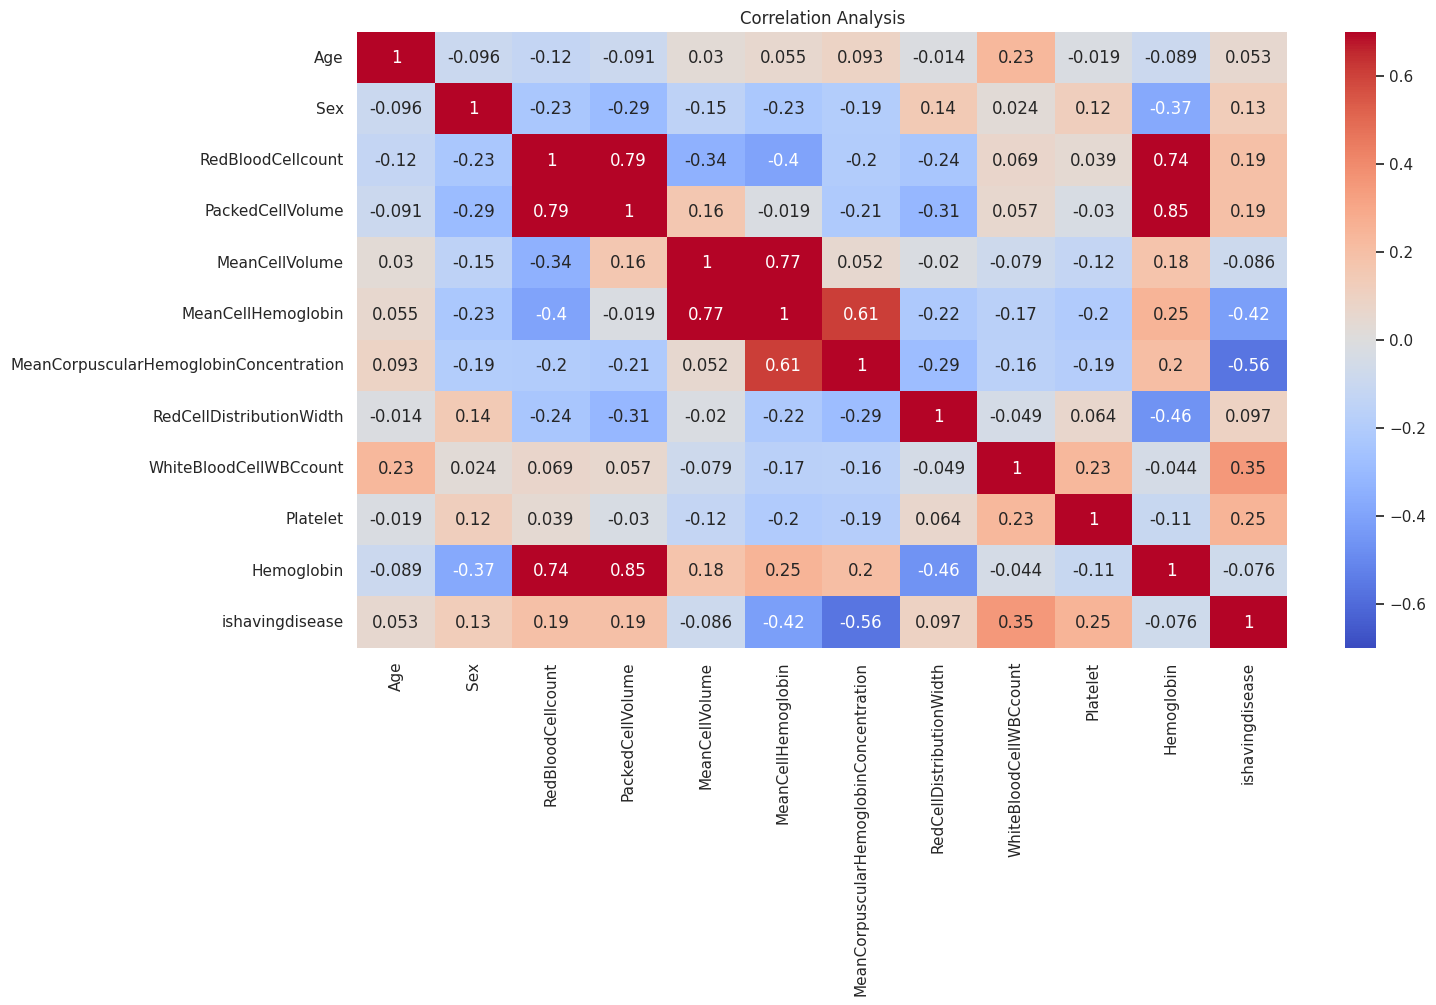

In [83]:
numeric_columns = scd.select_dtypes(include=['int64', 'float64']).columns
continuous_variables = list(numeric_columns)

# Correlation magnitude
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = scd[continuous_variables].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-0.7, vmax=0.7)



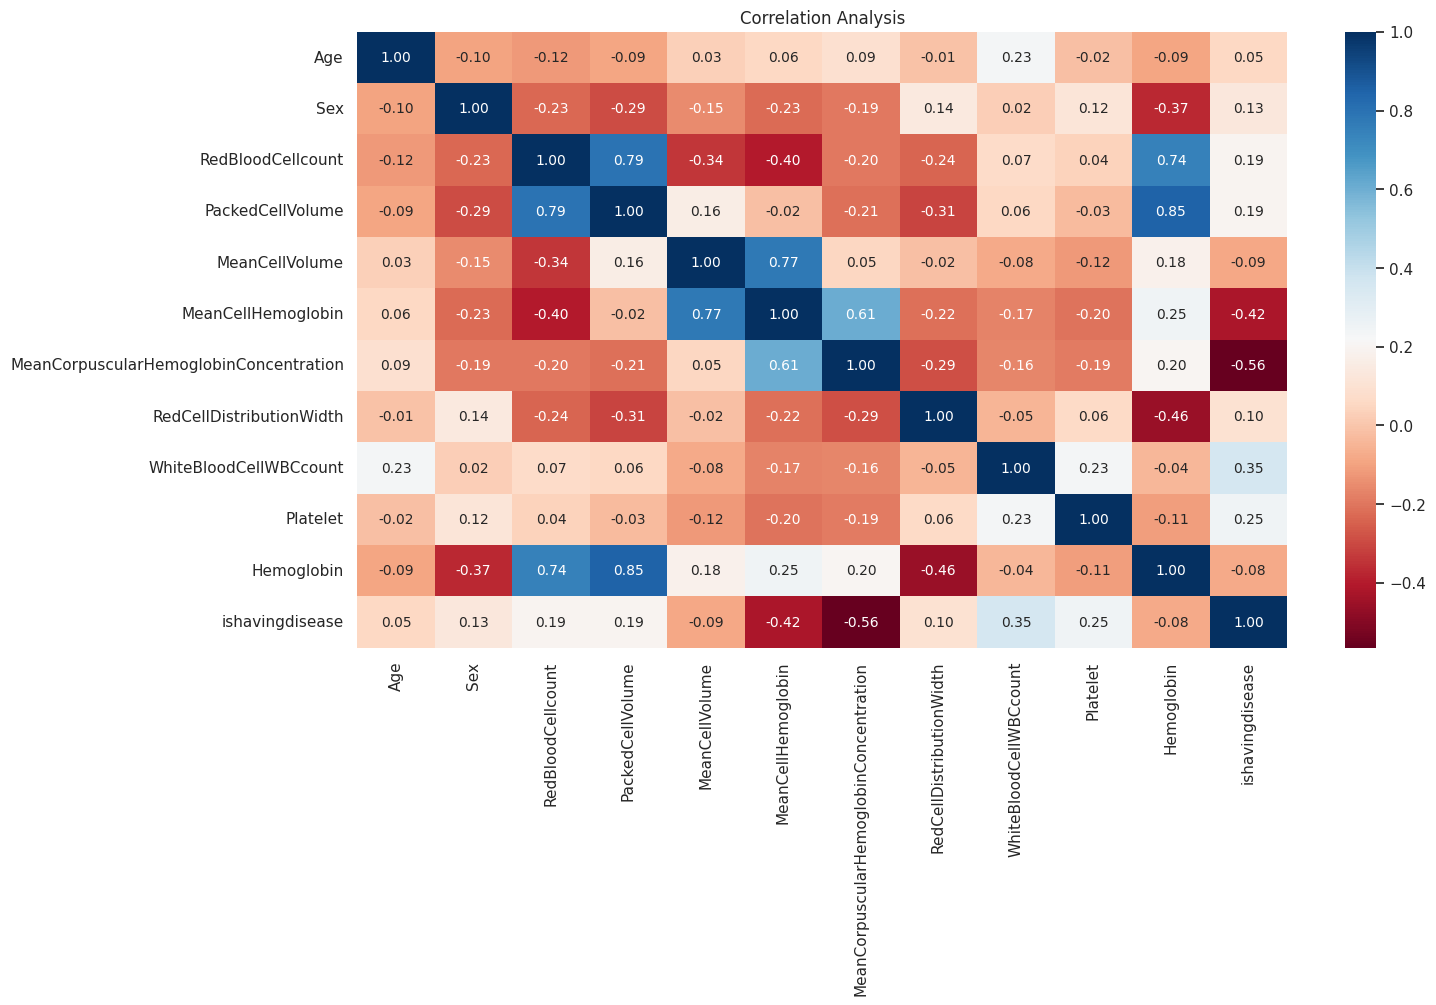

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = scd.select_dtypes(include=['int64', 'float64']).columns
continuous_variables = list(numeric_columns)

# Correlation analysis
plt.figure(figsize=(15, 8))
plt.title('Correlation Analysis')
correlation = scd[continuous_variables].corr()

# Option 1: Using a colormap with wider range and clear distinction

# Consider colormaps like 'RdGy' (red-gray), 'bwr' (blue-white-red), or 'RdBu' (red-blue)
sns.heatmap(
    correlation,
    annot=True,
    cmap='RdBu',
    fmt=".2f",
    annot_kws={"size": 10}  # Adjust the font size as needed
)


# Option 2: Scaling data (if correlation values have limited range)

# You can use techniques like min-max scaling or standardization
# This might be necessary if strong correlations are clustered in a small range.
# Implement scaling here if needed (code not shown for brevity)

plt.show()


<Axes: >

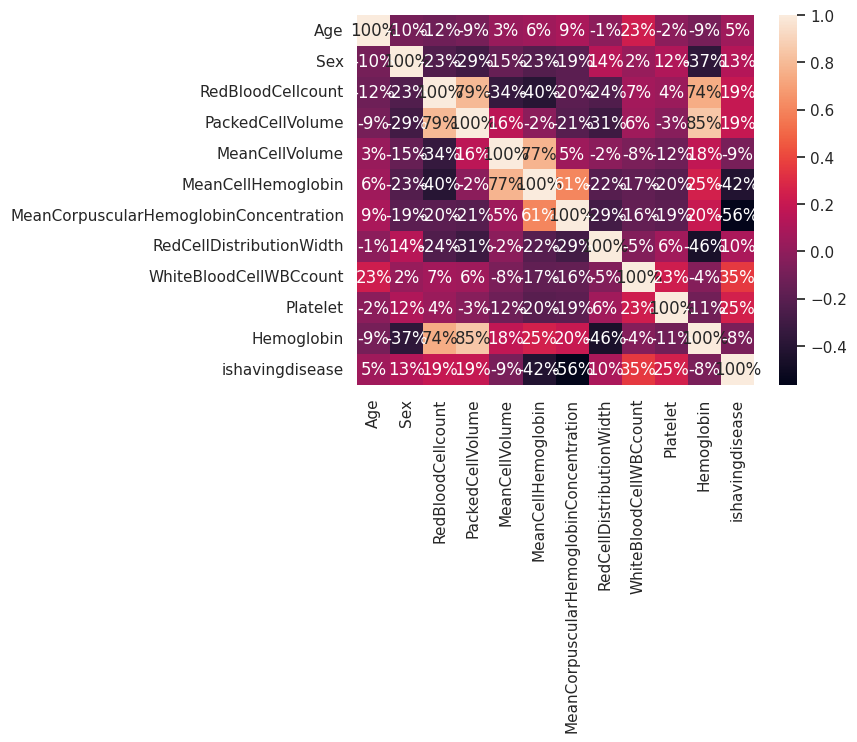

In [88]:
sns.heatmap(scd.corr(),annot=True,fmt='.0%')

Handling Multi-Collinearity

In [90]:
# Range of systolic Packed_Cell_Volume and Hemoglobin

print(scd['PackedCellVolume'].min(),scd['PackedCellVolume'].max())
print(scd['Hemoglobin'].min(),scd['Hemoglobin'].max())

13.1 56.9
4.2 19.6


In [91]:
# Range of systolic Packed_Cell_Volume and Mean_Corpuscular_Hemoglobin_Concentration

print(scd['PackedCellVolume'].min(),scd['PackedCellVolume'].max())
print(scd['MeanCorpuscularHemoglobinConcentration'].min(),scd['MeanCorpuscularHemoglobinConcentration'].max())

13.1 56.9
23.6 50.2


In [92]:
# Range of systolic White_Blood_Cell_ and Hemoglobin

print(scd['WhiteBloodCellWBCcount'].min(),scd['WhiteBloodCellWBCcount'].max())
print(scd['Hemoglobin'].min(),scd['Hemoglobin'].max())

2.0 42.42
4.2 19.6


In [93]:
# Range of systolic White_Blood_Cell_ and Hemoglobin

print(scd['RedBloodCellcount'].min(),scd['RedBloodCellcount'].max())
print(scd['Hemoglobin'].min(),scd['Hemoglobin'].max())

1.36 6.9
4.2 19.6


## FEATURE SELECTION

Transforming continuous variables to reduce skew

In [94]:
# skewness along the index axis
(scd[continuous_variables]).skew(axis = 0)

Age                                       0.149032
Sex                                       0.281934
RedBloodCellcount                        -0.368363
PackedCellVolume                         -0.406720
MeanCellVolume                            0.136293
MeanCellHemoglobin                        0.022518
MeanCorpuscularHemoglobinConcentration    1.430046
RedCellDistributionWidth                  2.001577
WhiteBloodCellWBCcount                    2.987899
Platelet                                  1.011545
Hemoglobin                               -0.502426
ishavingdisease                           0.315224
dtype: float64

Analysing the distribution of transformed features

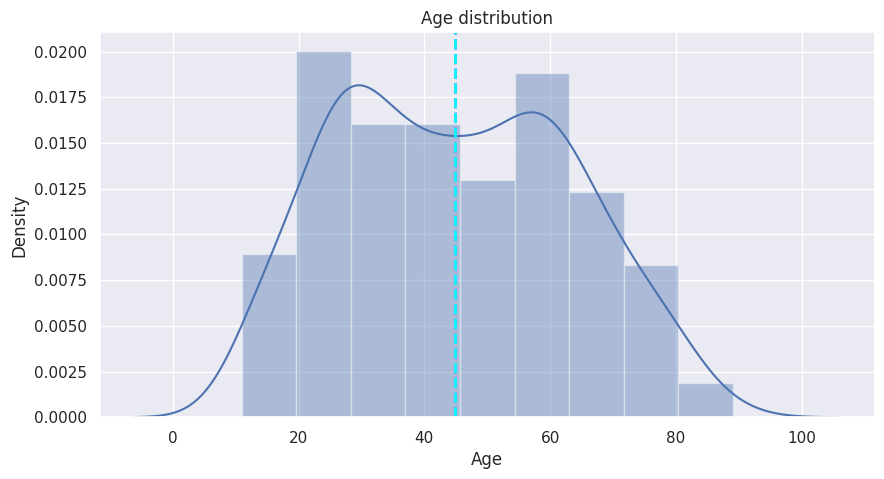

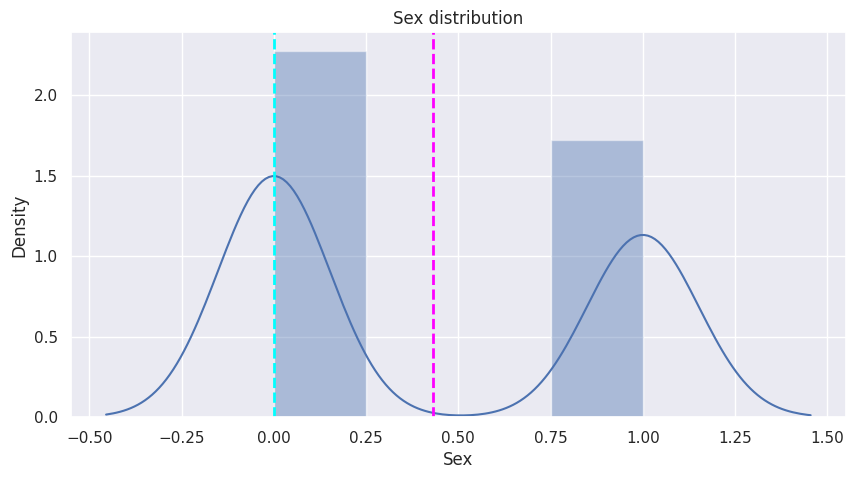

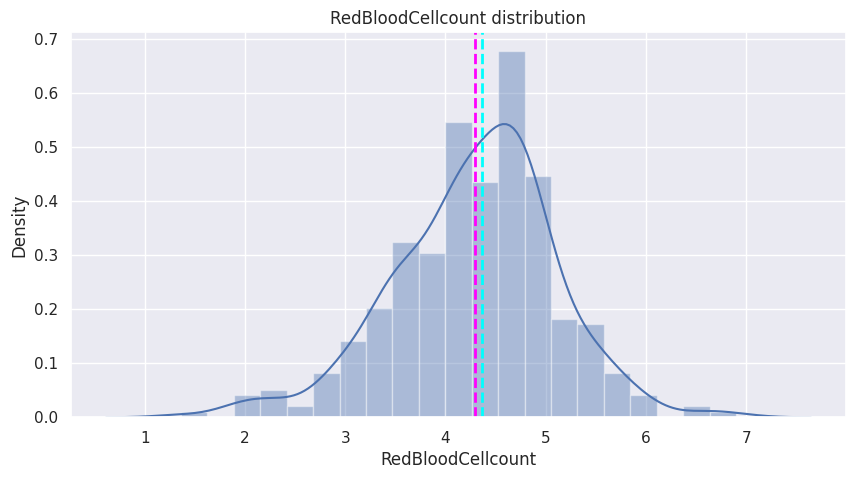

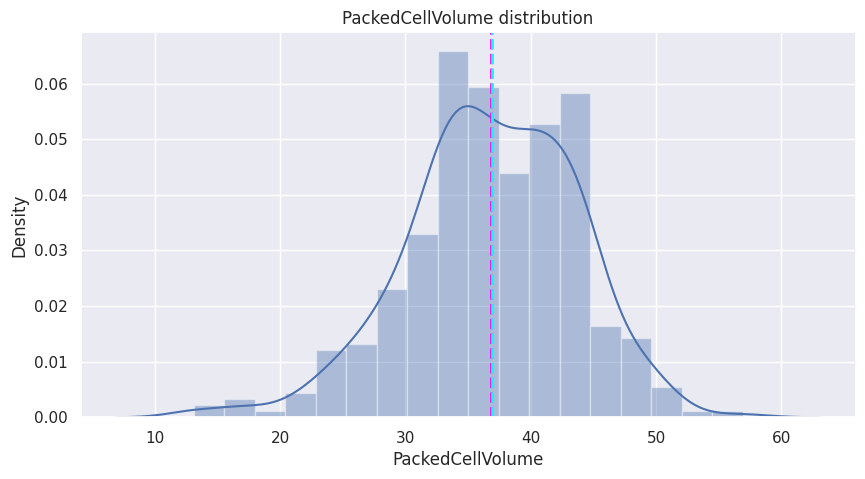

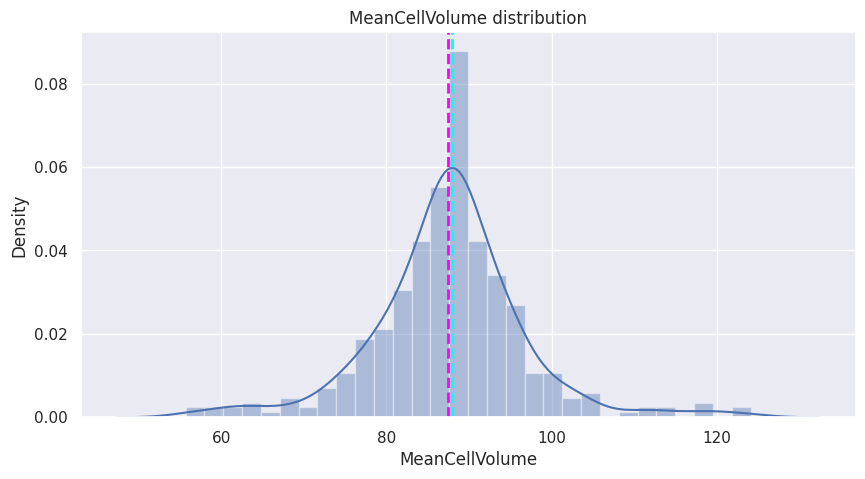

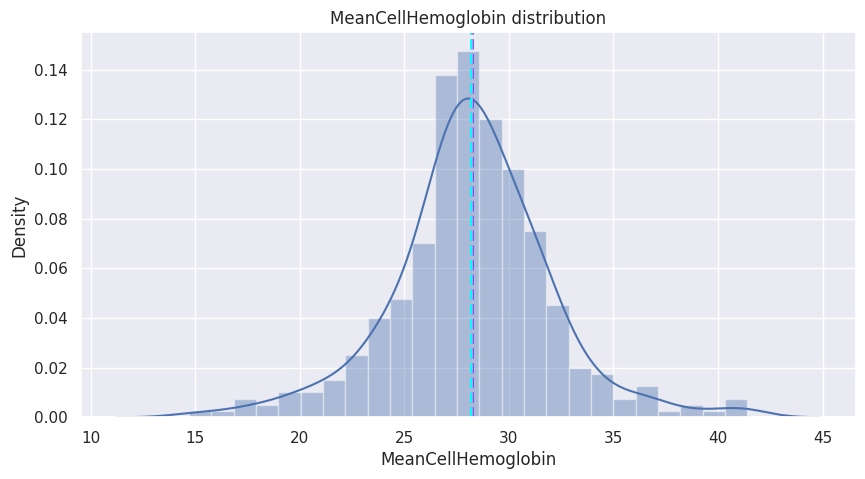

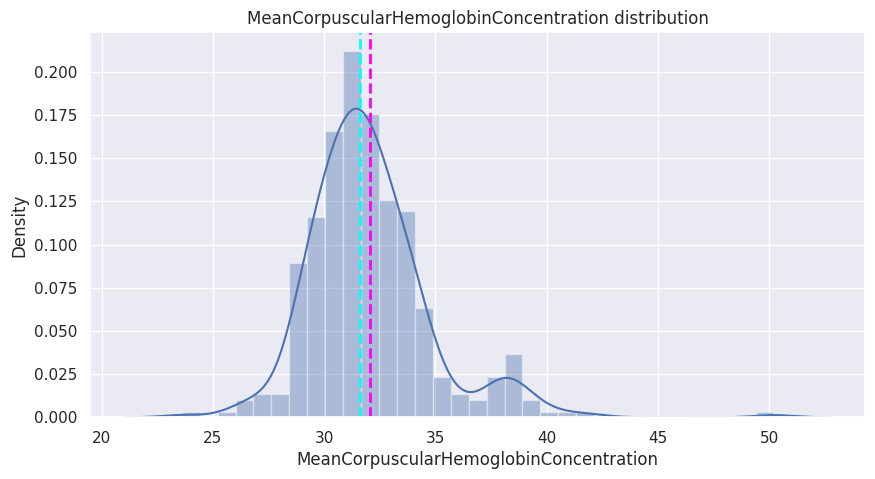

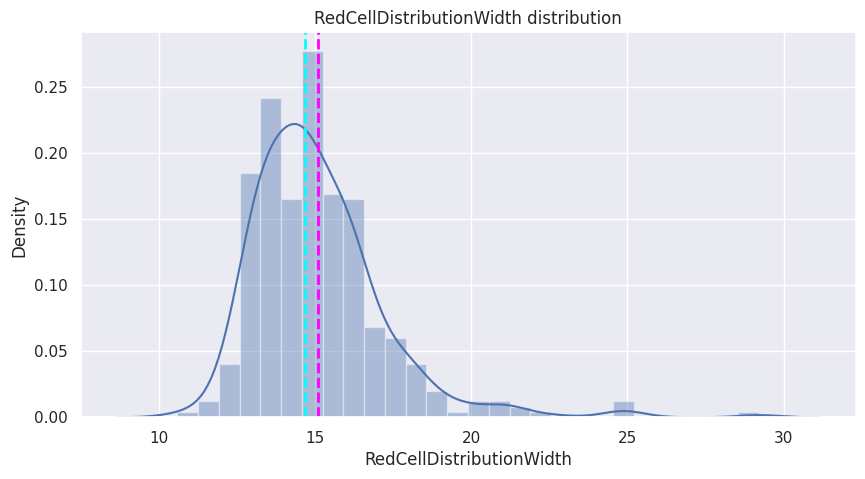

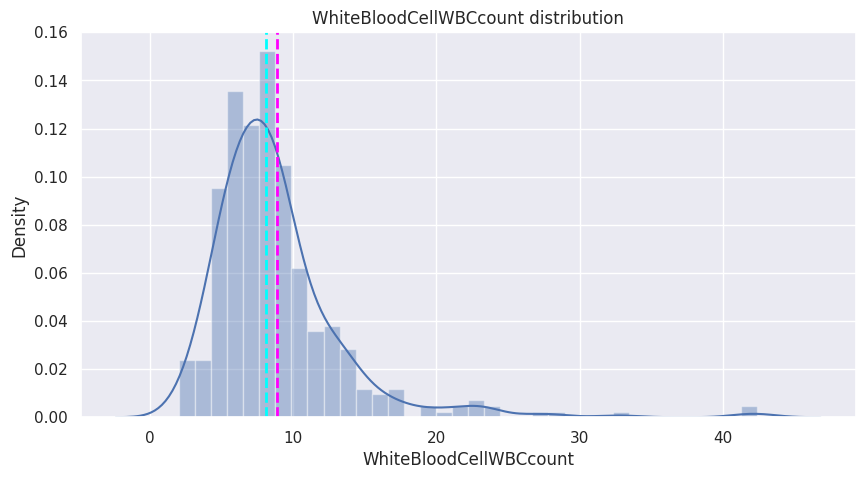

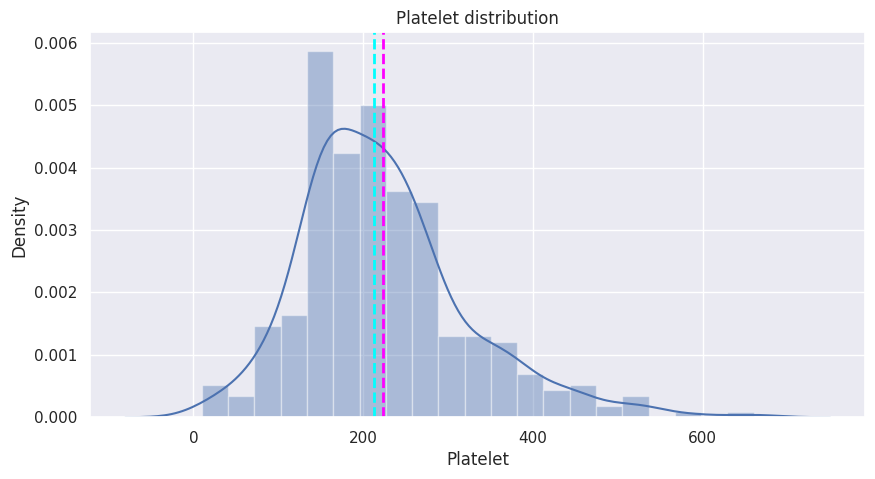

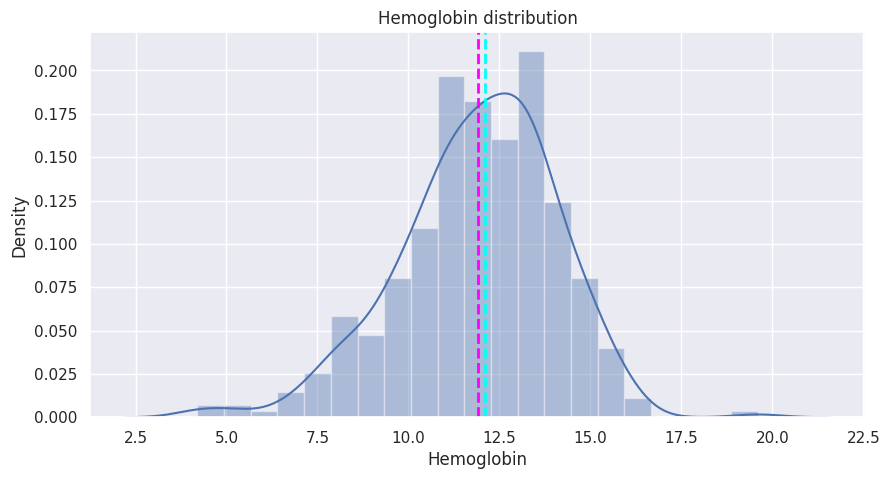

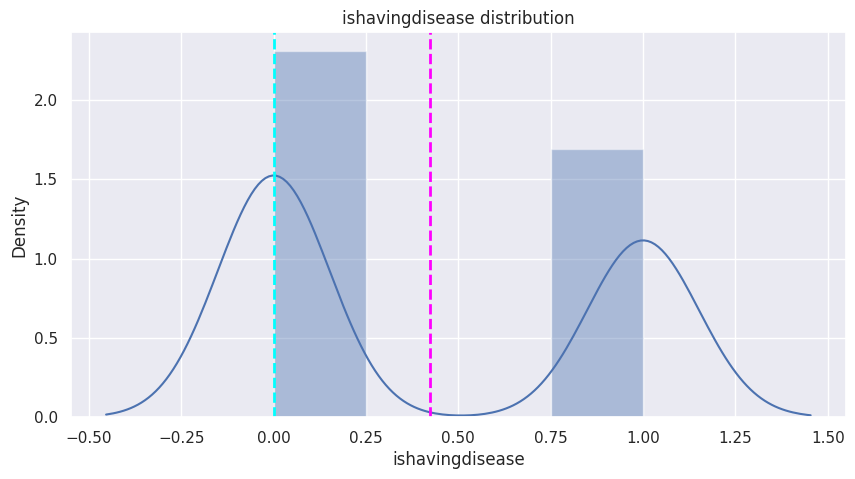

In [95]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_variables:
  plt.figure(figsize=(10,5))
  sns.distplot(scd[col])
  plt.axvline(scd[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(scd[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

checking for outliers in transformed features

## DATA PRE-PROCESSING

In [132]:
# Defining dependent and independent variables
x = scd.drop(['ishavingdisease'],axis=1)
y = scd['ishavingdisease']

In [133]:
# function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

In [134]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your original data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

# Now you have training and testing sets with the same number of samples (ideally)


In [135]:
 x_train

Age  Sex  RedBloodCellcount  PackedCellVolume  MeanCellVolume  \
242  69.000000  1.0              5.340             43.40           81.30   
141  42.000000  1.0              4.220             35.50           84.10   
284  66.000000  0.0              4.120             27.40           81.50   
184  50.000000  1.0              4.330             29.60           88.90   
29   80.000000  0.0              3.810             34.80           91.30   
..         ...  ...                ...               ...             ...   
194  25.000000  1.0              4.110             31.70           77.10   
135  35.000000  0.0              4.640             40.50           87.30   
113  57.000000  0.0              3.370             33.40           99.10   
275  63.000000  0.0              5.530             46.20           83.50   
373  44.917582  0.0              4.717             40.51           87.95   

     MeanCellHemoglobin  MeanCorpuscularHemoglobinConcentration  \
242                24.5                                   30.20   
141                27.3                                   32.40   
284                31.7                                   38.80   
184                30.5                                   33.90   
29                 26.5                                   29.00   
..                  ...                                     ...   
194                23.1                                   30.00   
135                28.7                                   32.80   
113                31.5                                   31.70   
275                25.1                                   30.10   
373                28.2                                   31.58   

     RedCellDistributionWidth  WhiteBloodCellWBCcount  Platelet  Hemoglobin  
242                      14.8                   7.150     233.0        13.1  
141                      13.1                   6.500     222.0        11.5  
284                      13.6                  11.600     172.0        13.0  
184                      15.7                   6.200     168.0        12.6  
29                       16.3                   9.110     188.0        10.1  
..                        ...                     ...       ...         ...  
194                      17.8                   6.490     176.0         9.5  
135                      12.8                   8.980     226.0        13.3  
113                      15.7                   3.100      78.0        10.6  
275                      15.3                   7.970     186.0        13.9  
373                      14.6                   8.389     221.9        12.1  

[261 rows x 11 columns]

In [117]:
y_train

242    1.0
141    0.0
284    0.0
184    0.0
29     1.0
      ... 
194    1.0
135    0.0
113    0.0
275    1.0
373    0.0
Name: ishavingdisease, Length: 261, dtype: float64

In [118]:
import pandas as pd

# Convert y_train to a pandas Series
y_train_series = pd.Series(y_train)

# Checking the train distribution of dependent variable
y_train_series.value_counts()


ishavingdisease
0.0    151
1.0    110
Name: count, dtype: int64

In [119]:
import pandas as pd

# Convert y_train to a pandas Series
y_test_series = pd.Series(y_test)

# Checking the train distribution of dependent variable
y_test_series.value_counts()


ishavingdisease
0.0    65
1.0    48
Name: count, dtype: int64

In [120]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(261, 10)
(261,)
(113, 10)
(113,)


HANDLING OUTLIERS IN TRAIN DATA

## ML MODEL IMPLEMENTATION

**SUPPORT VECTOR MACHINE**

In [104]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Instantiate SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf' or 'poly'

# Train the SVM classifier
svm_classifier.fit(x_train, y_train)

# Predict labels for test data
y_pred = svm_classifier.predict(x_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.8672566371681416
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        65
         1.0       0.84      0.85      0.85        48

    accuracy                           0.87       113
   macro avg       0.86      0.87      0.86       113
weighted avg       0.87      0.87      0.87       113



In [151]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define input features and target variable
X = scd[['Age','Sex', 'RedBloodCellcount', 'PackedCellVolume', 'MeanCellVolume',
                 'MeanCellHemoglobin', 'MeanCorpuscularHemoglobinConcentration',
                 'RedCellDistributionWidth', 'WhiteBloodCellWBCcount', 'Platelet', 'Hemoglobin']].values
y = scd['ishavingdisease'].values

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

# Create and train the SVC model
classifier = SVC(kernel='linear')
classifier.fit(X, y)

# Define input values for prediction

list1=x_train[3:4]
# Prepare input for prediction
# list1 = [age,sex, red_blood_cell_count, packed_cell_volume, mean_cell_volume,
#          mean_cell_hemoglobin, mean_corpuscular_hemoglobin_concentration,
#          red_cell_distribution_width, white_blood_cell_wbc_count, platelet, hemoglobin]

# Scale the input using the fitted scaler
scaled_input = sc_X.transform(np.array(list1).reshape(1, -1))

# Predict whether the person has the disease
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X, y)

# Predict the risk factor
# Predict the risk factor
# Predict the risk factor
risk_factor = regressor.predict(sc_X.transform(np.array(list1).reshape(1, -1)))
print("Risk factor:", risk_factor[0])


Risk factor: 0.008060968597591034


In [156]:
risk_factor

array([0.00806097])

In [157]:
if risk_factor[0]<0:
  print("low risk")
elif risk_factor[0]<=0.5:
  print("moderate risk")
else:
  print("high risk")

moderate risk


In [152]:
# Evaluate the accuracy of the model on the training data
accuracy = classifier.score(X, y)
print("Accuracy:", accuracy)


Accuracy: 0.8716577540106952


In [148]:
scd[1:2]

Age  Sex  RedBloodCellcount  PackedCellVolume  MeanCellVolume  \
1  28.0  0.0               5.66              34.0            60.1   

   MeanCellHemoglobin  MeanCorpuscularHemoglobinConcentration  \
1                17.0                                    28.2   

   RedCellDistributionWidth  WhiteBloodCellWBCcount  Platelet  Hemoglobin  \
1                      20.0                    11.1     128.3         9.6   

   ishavingdisease  
1              1.0

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score

# Assuming x contains your features and y contains the target variable (risk)
# Split the data into training and testing sets
# Create an Isolation Forest model
isolation_forest_model = IsolationForest(random_state=42)

# Train the model on the training data
isolation_forest_model.fit(x_train)

# Make predictions on the test data
y_pred = isolation_forest_model.predict(x_test)

# Since Isolation Forest is an unsupervised anomaly detection algorithm,
# it assigns 1 to inliers (normal instances) and -1 to outliers (anomalies).
# You may need to adjust your evaluation based on your specific problem.

# For example, if you consider -1 as "risky" and 1 as "not risky", you can convert the predictions accordingly
y_pred = [1 if pred == 1 else -1 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.40707964601769914


In [154]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression

def models(x_train, y_train, x_test, y_test):
    # Check the unique classes in y_train
    print("Unique classes in y_train:", np.unique(y_train))

    # Create and train the logistic regression model
    logistic_model = LogisticRegression(random_state=0)
    logistic_model.fit(x_train, y_train)

    # Make predictions
    y_pred = logistic_model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print logistic regression accuracy on training data
    print("Logistic Regression Accuracy:", logistic_model.score(x_train, y_train))

    return accuracy, logistic_model

# Assuming x_train, y_train, x_test, and y_test are your training and testing data
# Check the shapes of your data
print("Shapes of x_train and y_train:", x_train.shape, y_train.shape)

# Call the models function with corrected data
accuracy, logistic_model = models(x_train, y_train, x_test, y_test)


Shapes of x_train and y_train: (261, 11) (261,)
Unique classes in y_train: [0. 1.]
Logistic Regression Accuracy: 0.8620689655172413


In [155]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming x and y are your features and target variable respectively
# Split the data into training and testing sets

# Check the unique classes in y_train
print("Unique classes in y_train:", np.unique(y_train))

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check the unique classes in y_train_resampled after SMOTE
print("Unique classes in y_train_resampled:", np.unique(y_train_resampled))

# Define and train your SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train_resampled, y_train_resampled)

# Make predictions
y_pred = svm_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Unique classes in y_train: [0. 1.]
Unique classes in y_train_resampled: [0. 1.]
Accuracy: 0.8672566371681416
